# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 35

Group Members:
- Hugo Sabam Augusto (13522129)
- Muhammad Zaki (13522136)


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

## Import Dataset

In [2]:
#additional_f = https://drive.google.com/file/d/19SR0jYNzV-B_xxS7nvGCNEtHjwNCIjrD/view?usp=drive_link
#basic_f = https://drive.google.com/file/d/1vUO46IM1HvPBH5Ru4NqD-7tCFEkxpcof/view?usp=drive_link
#content_f = https://drive.google.com/file/d/1fv4P17zliOxqzo91WNQFVMlaHXJq4mjv/view?usp=drive_link
#flow_f = https://drive.google.com/file/d/1A5za6PRn1bm7Z4jMA4Iatel6J_i8Dl8u/view?usp=drive_link
#label_f = https://drive.google.com/file/d/1MiBi4en6pLWSXePD_wpxN5eB9fTPTlaq/view?usp=drive_link
#time_f = https://drive.google.com/file/d/1oewiZwrE26gali7tcPaHF15WDryQnpc4/view?usp=drive_link
#metadata = https://drive.google.com/file/d/1Tp465UIFmN2utfKV5ET634lwOZNdQ0jp/view?usp=drive_link

df_additional_train = pd.read_csv('https://drive.google.com/uc?id=19SR0jYNzV-B_xxS7nvGCNEtHjwNCIjrD')
df_basic_train = pd.read_csv('https://drive.google.com/uc?id=1vUO46IM1HvPBH5Ru4NqD-7tCFEkxpcof')
df_content_train = pd.read_csv('https://drive.google.com/uc?id=1fv4P17zliOxqzo91WNQFVMlaHXJq4mjv')
df_flow_train = pd.read_csv('https://drive.google.com/uc?id=1A5za6PRn1bm7Z4jMA4Iatel6J_i8Dl8u')
df_label_train = pd.read_csv('https://drive.google.com/uc?id=1MiBi4en6pLWSXePD_wpxN5eB9fTPTlaq')
df_time_train = pd.read_csv('https://drive.google.com/uc?id=1oewiZwrE26gali7tcPaHF15WDryQnpc4')
df_metadata_train = pd.read_csv('https://drive.google.com/uc?id=1Tp465UIFmN2utfKV5ET634lwOZNdQ0jp')






In [3]:
df_train= df_basic_train.merge(df_additional_train, on="id") \
                  .merge(df_content_train, on="id") \
                  .merge(df_flow_train, on="id") \
                  .merge(df_time_train, on="id") \
                  .merge(df_label_train, on="id") \


df_train = df_train.drop(columns=['id'])
df_train.head()

,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,...,proto,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,attack_cat,label
0,FIN,2.736664,13350.0,548216.0,31.0,29.0,21.0,197.0,-,3.885899e+04,...,tcp,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114,Normal,0
1,INT,0.000009,114.0,0.0,254.0,0.0,0.0,0.0,dns,5.066666e+07,...,udp,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN,Generic,1
2,FIN,5.788526,6102.0,3892.0,254.0,252.0,13.0,13.0,-,8.199669e+03,...,tcp,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,Exploits,1
3,FIN,3.849634,25160.0,NaN,31.0,29.0,38.0,390.0,-,5.216912e+04,...,tcp,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN,Normal,0
4,CON,0.001052,130.0,162.0,NaN,29.0,0.0,0.0,dns,4.942966e+05,...,udp,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000,Normal,0


In [4]:
df_additional_test = pd.read_csv('https://drive.google.com/uc?id=1vwlNVhgCqNYwMUC2R49CcBSCy897_hQt')
df_basic_test = pd.read_csv('https://drive.google.com/uc?id=1-Zk_7yGWh8JjkeYqb5iDG2a5NsMho0FY')
df_content_test = pd.read_csv('https://drive.google.com/uc?id=1Hp10_6slB9wvtNL7BexHgeum0kRV8V40')
df_flow_test= pd.read_csv('https://drive.google.com/uc?id=10v_f5AszRKJomFc_UKG-QRabkTs7bCIY')
df_time_test = pd.read_csv('https://drive.google.com/uc?id=1pe75Lb5PP4veS51V1Tw8esxG2DJqAnW5')



In [5]:
df_test= df_basic_test.merge(df_additional_test, on="id") \
                  .merge(df_content_test, on="id") \
                  .merge(df_flow_test, on="id") \
                  .merge(df_time_test, on="id") \

df_test.head()

,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,...,trans_depth,response_body_len,proto,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
0,FIN,0.454980,534.0,268.0,254.0,252.0,2.0,1.0,-,8457.514648,...,0.0,0.0,tcp,2737.954123,118.833969,48.756556,76.593602,0.165117,0.072001,0.093116
1,FIN,0.648037,8854.0,268.0,254.0,252.0,4.0,1.0,-,101500.375000,...,0.0,0.0,tcp,2938.299144,165.780563,49.812539,109.557602,0.223604,0.100248,0.123356
2,FIN,1.120856,3440.0,642.0,254.0,252.0,5.0,3.0,-,23018.121090,...,0.0,0.0,tcp,4287.453629,129.471406,69.765530,94.395906,0.113189,0.082498,0.030691
3,INT,0.000001,244.0,0.0,254.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,udp,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000
4,FIN,0.264763,1540.0,1644.0,31.0,29.0,4.0,4.0,-,43631.472660,...,0.0,0.0,tcp,1119.063538,26.748141,17.628799,15.543294,0.000655,0.000526,0.000129




```
# This is formatted as code
```

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## I. General Information

In [6]:
categorical_features = df_train.drop(columns=['attack_cat','label']).select_dtypes(include=['object']).columns
numerical_features = df_train.drop(columns=['attack_cat','label']).select_dtypes(include=[np.number]).columns


potentially_categorical = [col for col in numerical_features if df_train[col].nunique() <= 2]

all_categorical_features = list(categorical_features) + potentially_categorical

unique_values = {col: df_train[col].unique() for col in all_categorical_features}
print("🔢 Nilai unik untuk setiap feature kategorikal:")
for col, values in unique_values.items():
    print(f"  - {col}: {len(values)} unique values")
    print(f"    Nilai unik: {values}")
    print()

numerical_features_strict = [col for col in numerical_features if col not in potentially_categorical]
print("📈 Stats untuk fitur numerik non-kategorikal:")
print(f"  Minimum Values:\n{df_train[numerical_features_strict].min().to_string()}\n")
print(f"  Maximum Values:\n{df_train[numerical_features_strict].max().to_string()}\n")
print(f"  Mean Values:\n{df_train[numerical_features_strict].mean().to_string()}\n")
print(f"  Median Values:\n{df_train[numerical_features_strict].median().to_string()}\n")
print(f"  Standard Deviation:\n{df_train[numerical_features_strict].std().to_string()}\n")

🔢 Nilai unik untuk setiap feature kategorikal:
  - state: 10 unique values
    Nilai unik: ['FIN' 'INT' 'CON' nan 'REQ' 'ECO' 'RST' 'URN' 'PAR' 'no']

  - service: 14 unique values
    Nilai unik: ['-' 'dns' 'smtp' nan 'http' 'pop3' 'ftp' 'ssh' 'ftp-data' 'ssl' 'dhcp'
 'snmp' 'radius' 'irc']

  - proto: 134 unique values
    Nilai unik: ['tcp' 'udp' 'st2' 'unas' 'irtp' nan 'vmtp' 'any' 'cpnx' 'sctp' 'ospf'
 'fc' 'cftp' 'rsvp' 'aris' 'dgp' 'ipv6-route' 'snp' 'pnni' 'arp' 'cbt'
 'scps' 'tcf' 'leaf-1' 'swipe' 'wb-mon' 'crudp' 'sun-nd' 'rdp' 'gmtp'
 'ifmp' 'mobile' 'prm' 'sps' 'ipx-n-ip' 'ipip' 'ipv6-no' 'crtp' 'gre'
 'zero' 'hmp' 'trunk-1' 'idpr' 'ib' 'idpr-cmtp' 'vines' 'micp' 'a/n'
 'ipv6' 'narp' 'ttp' 'eigrp' 'uti' 'mux' 'pim' 'srp' 'wsn' 'tlsp' 'argus'
 '3pc' 'ax.25' 'ipnip' 'l2tp' 'skip' 'ipv6-frag' 'il' 'rvd' 'visa' 'xtp'
 'sm' 'xns-idp' 'ipv6-opts' 'encap' 'ippc' 'merit-inp' 'dcn' 'netblt'
 'bbn-rcc' 'emcon' 'nsfnet-igp' 'iso-tp4' 'ipcv' 'sat-mon' 'nvp' 'i-nlsp'
 'etherip' 'pvp' 's

## II. Distribution Plot

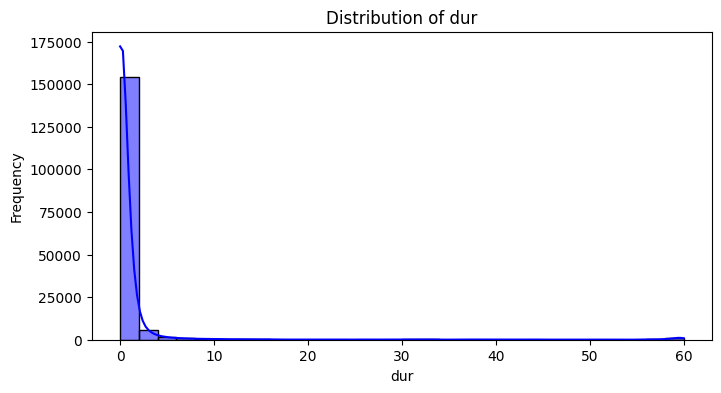

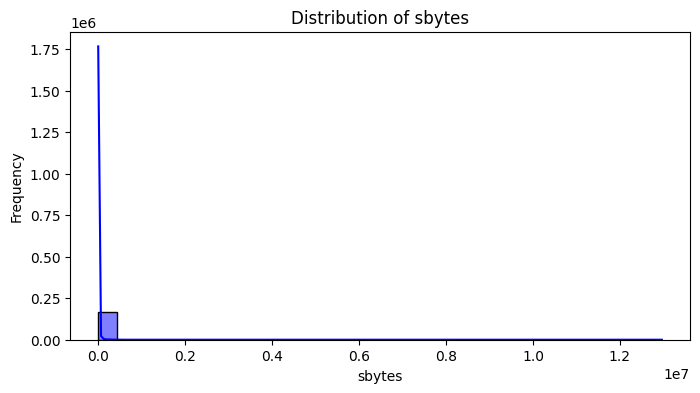

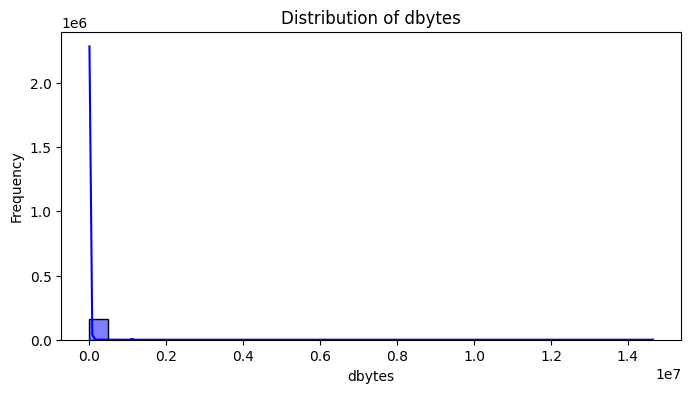

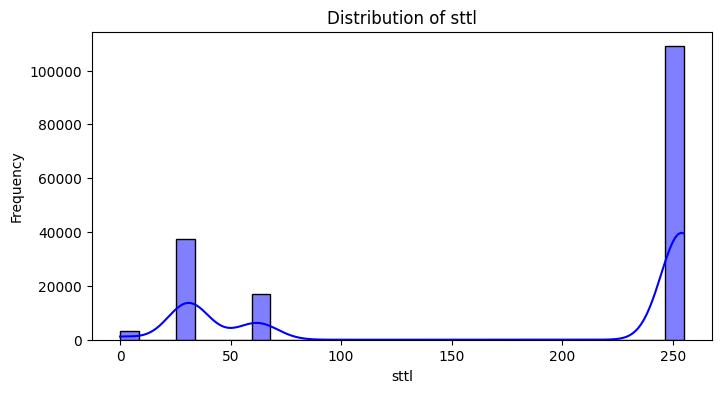

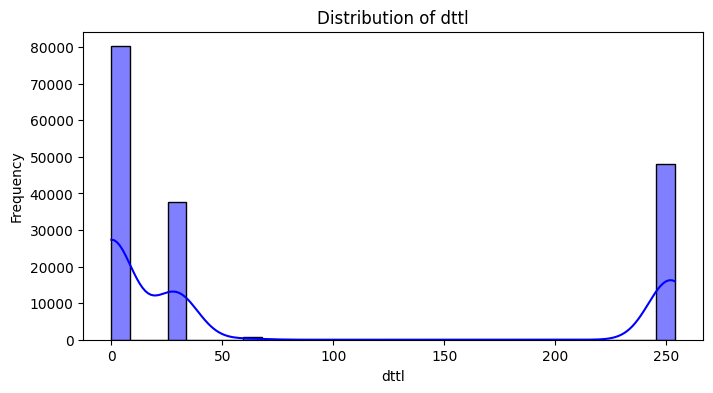

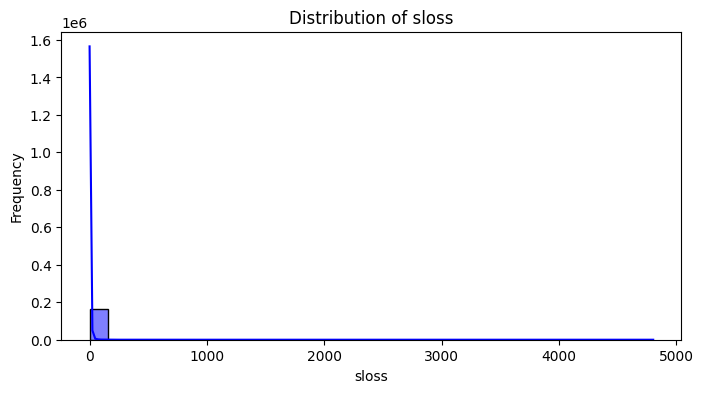

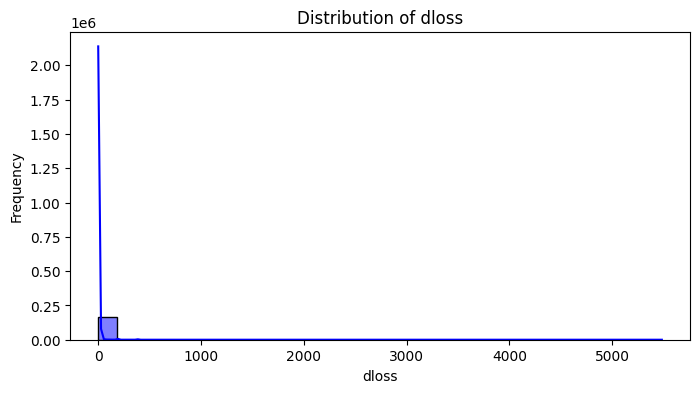

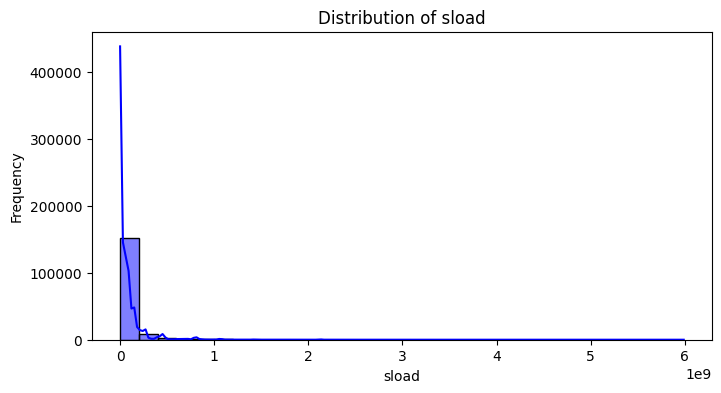

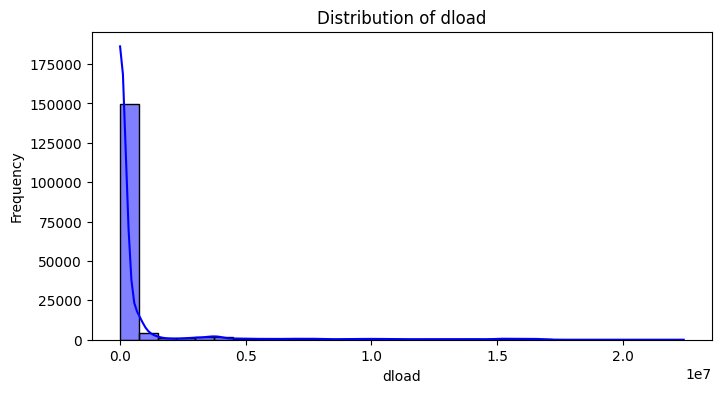

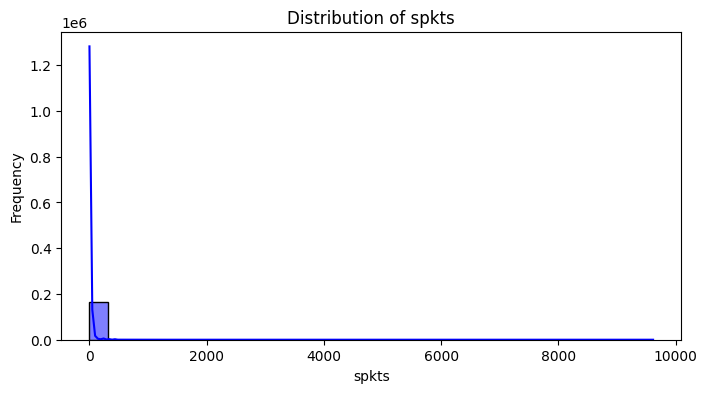

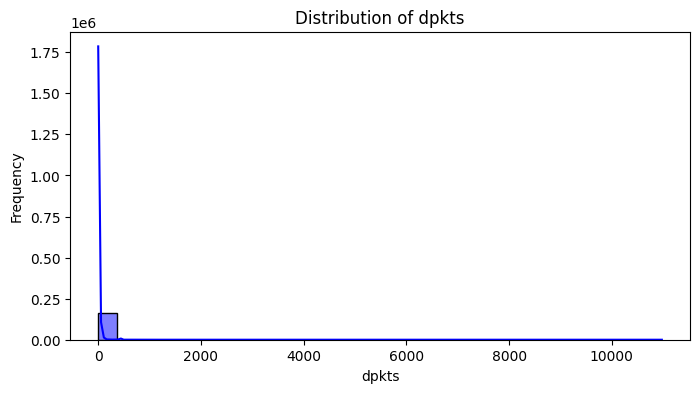

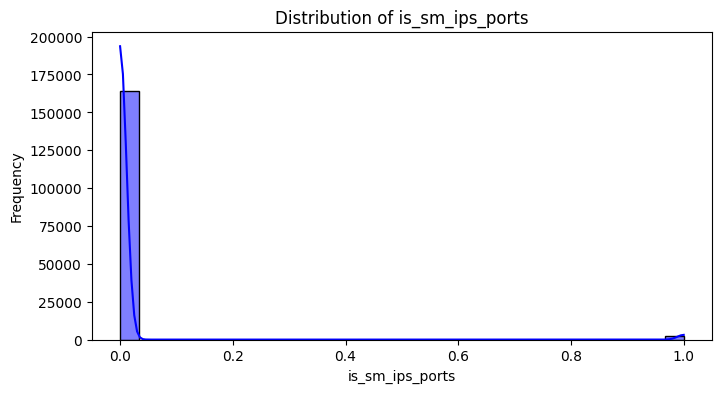

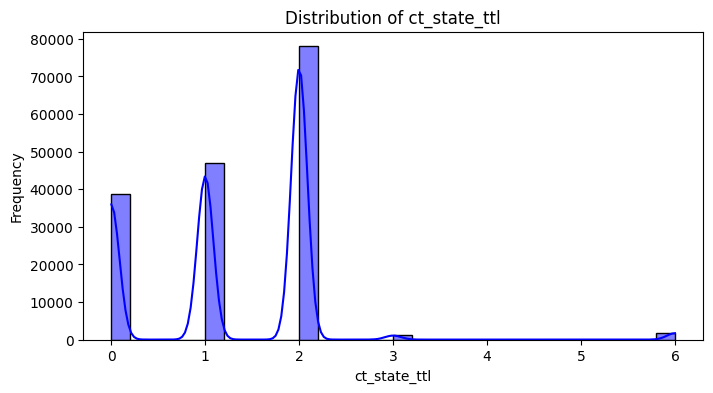

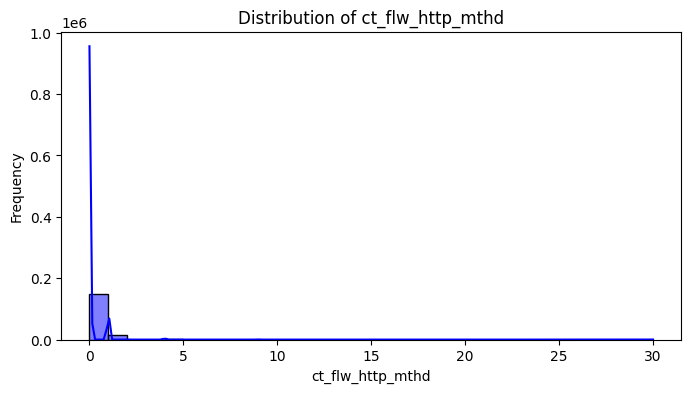

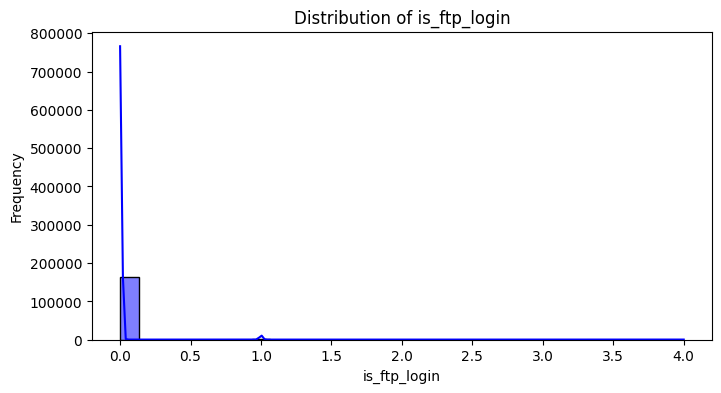

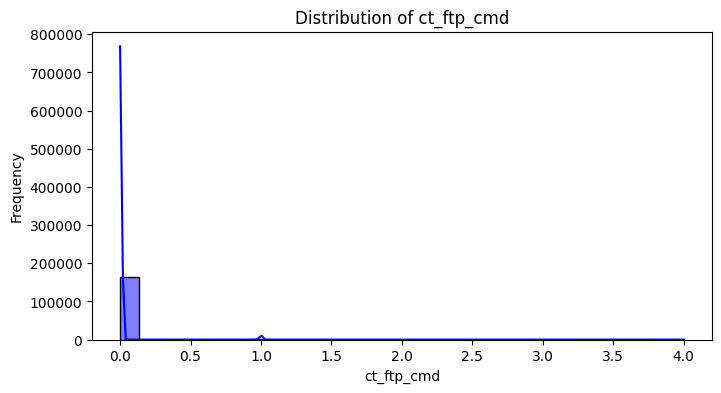

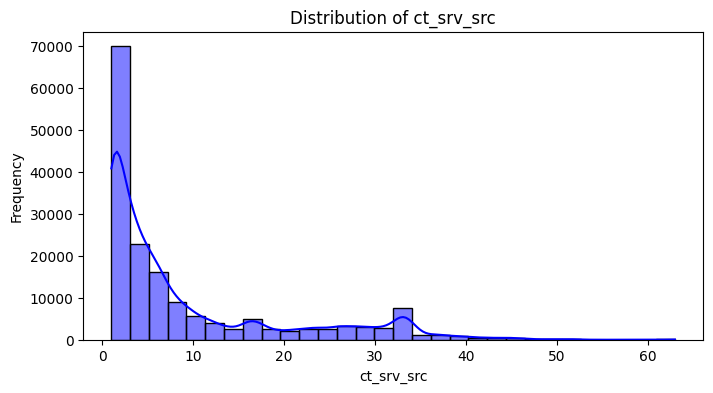

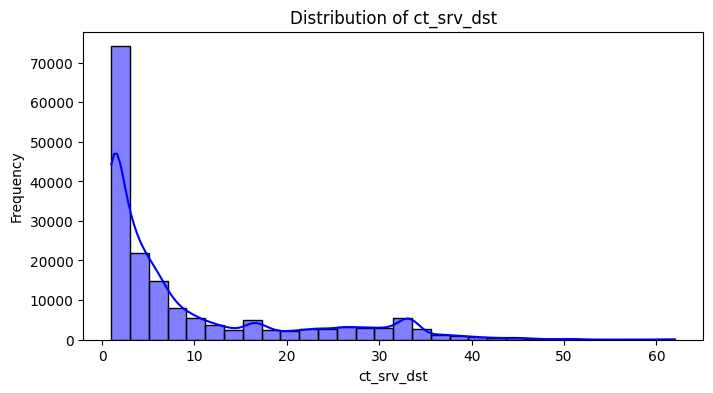

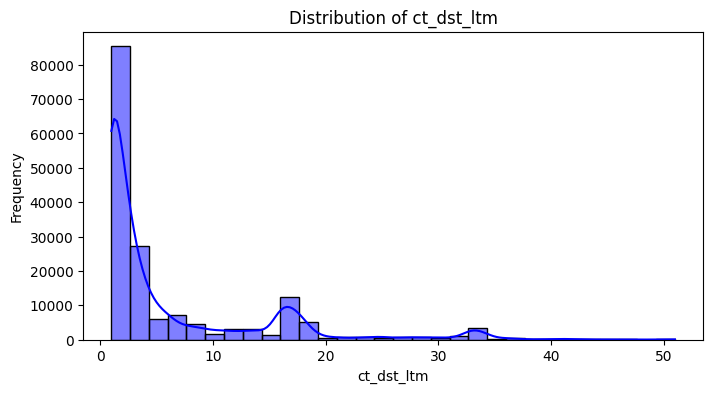

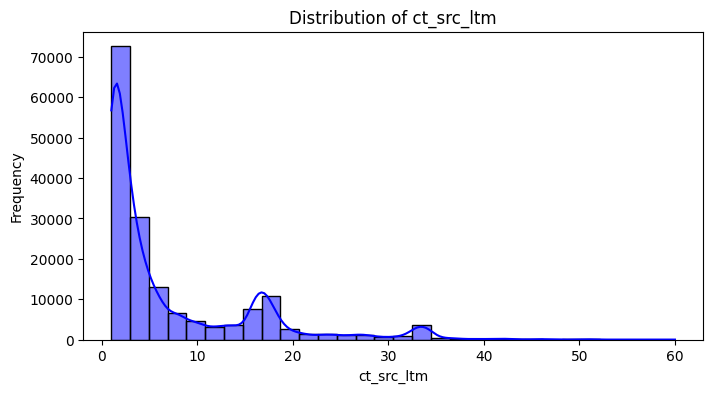

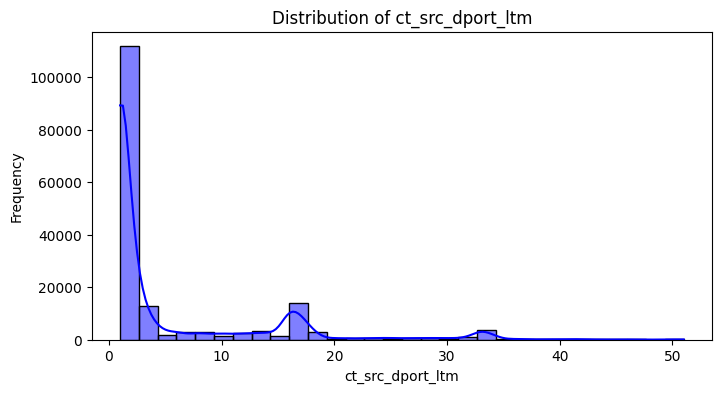

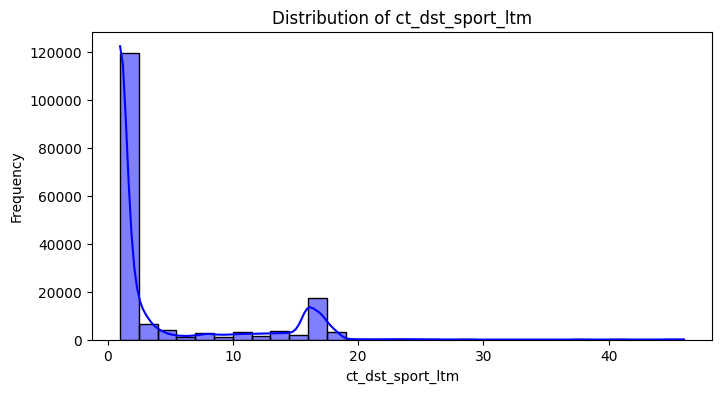

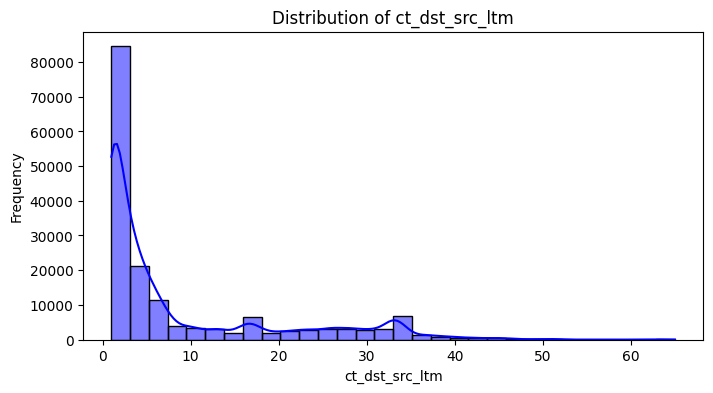

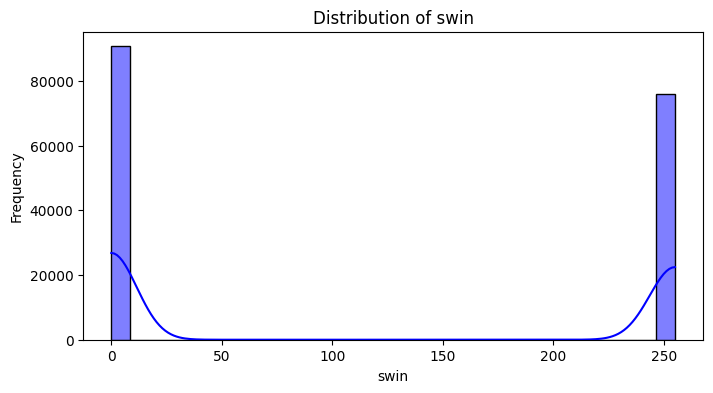

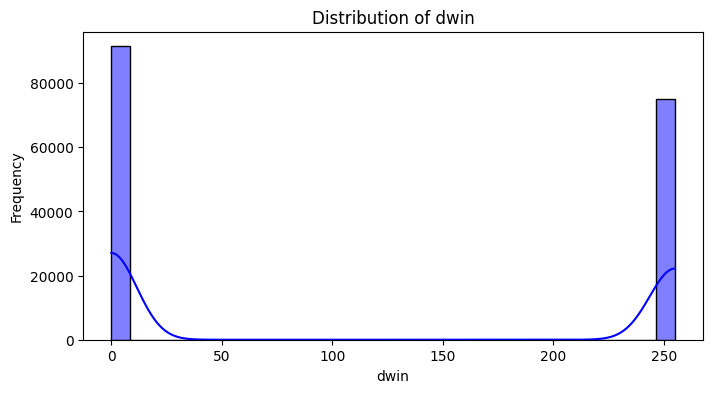

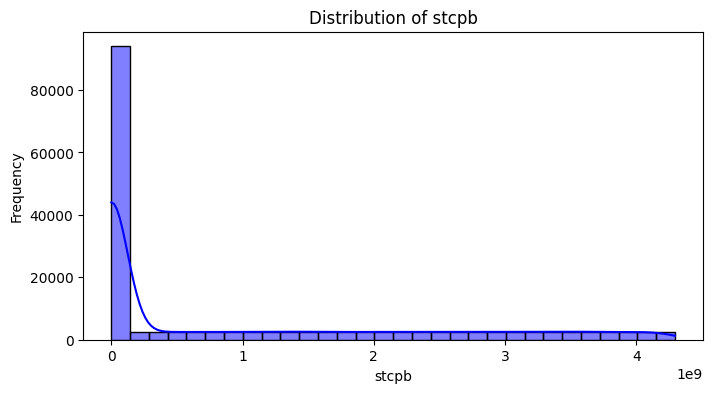

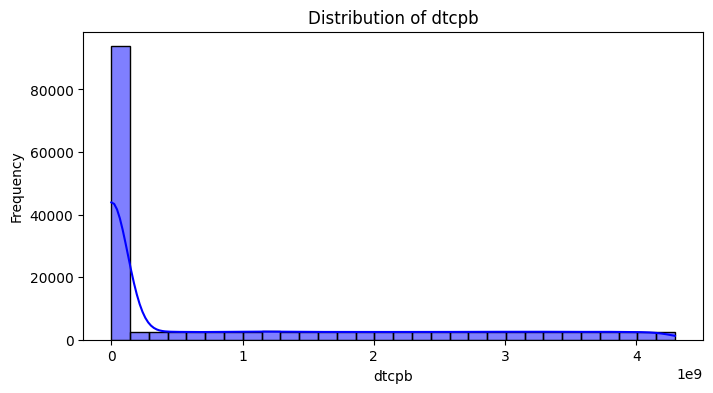

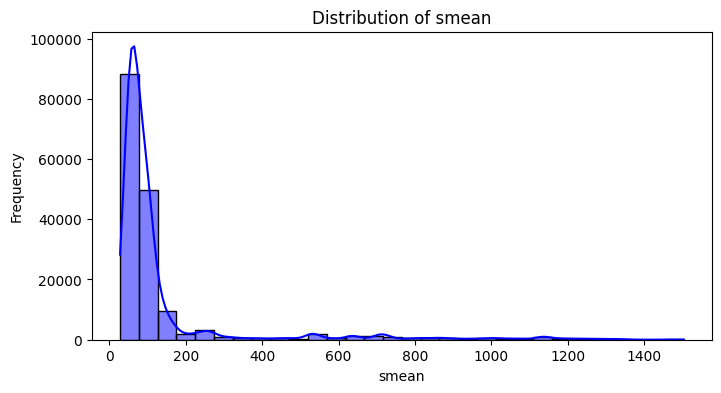

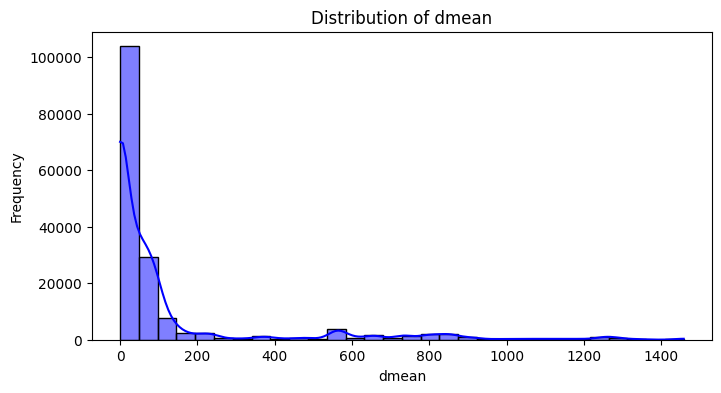

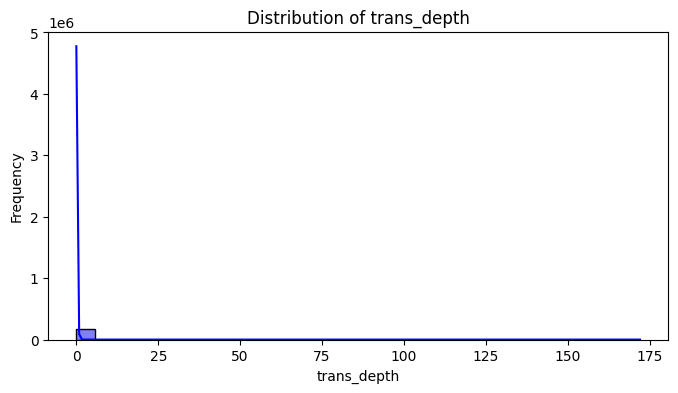

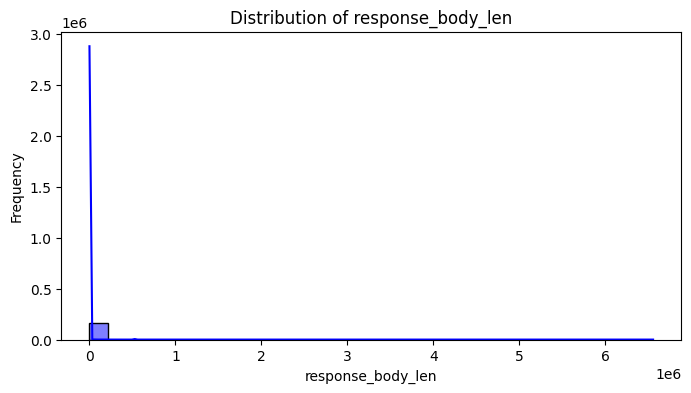

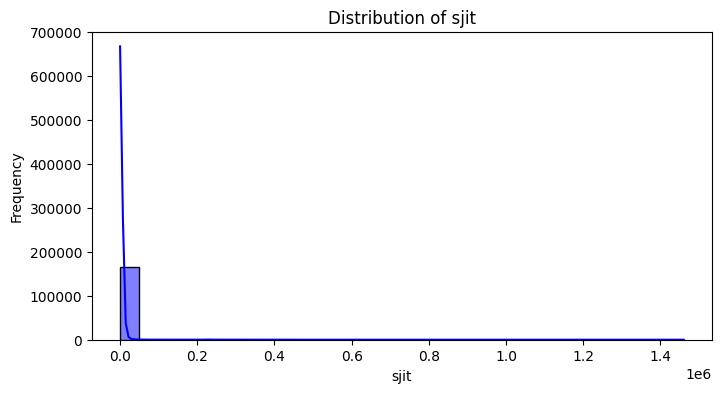

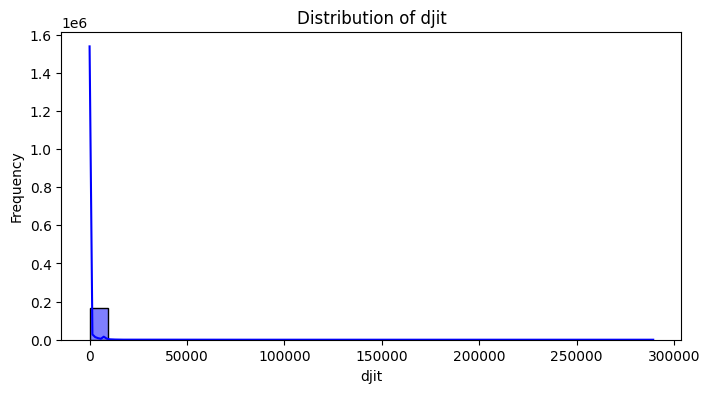

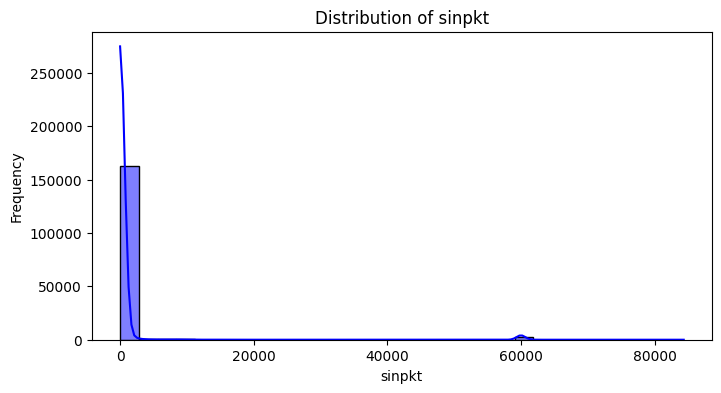

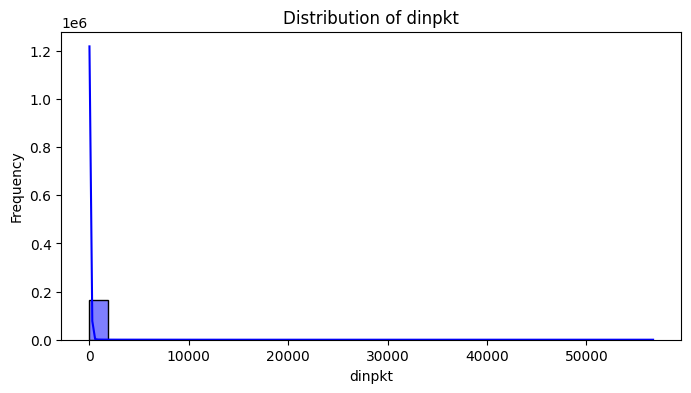

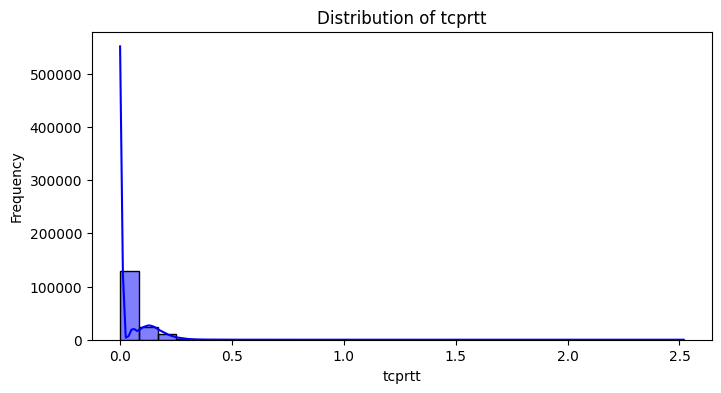

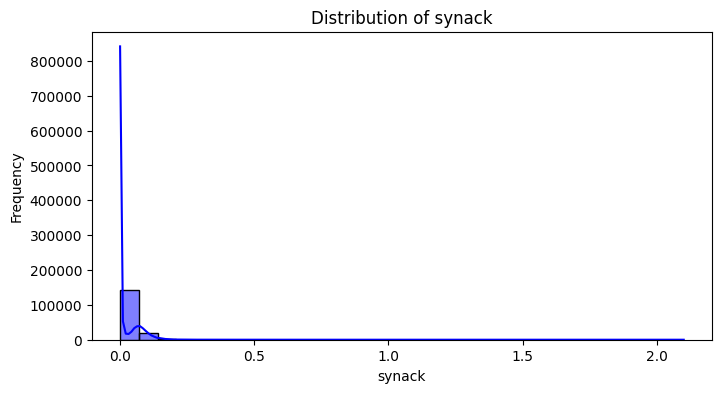

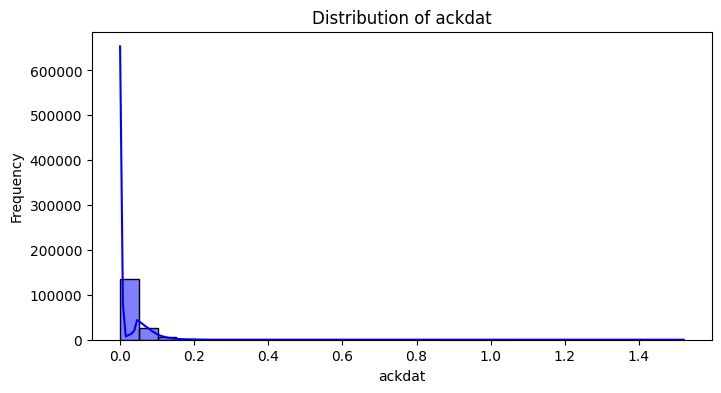

<ipython-input-7-a90169173469>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=column, palette='viridis')


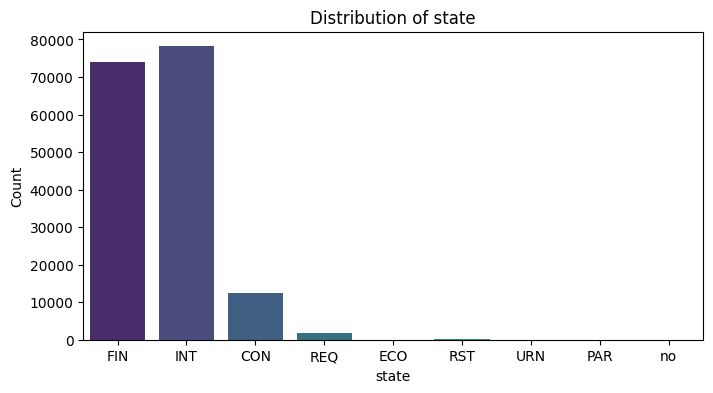

<ipython-input-7-a90169173469>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=column, palette='viridis')


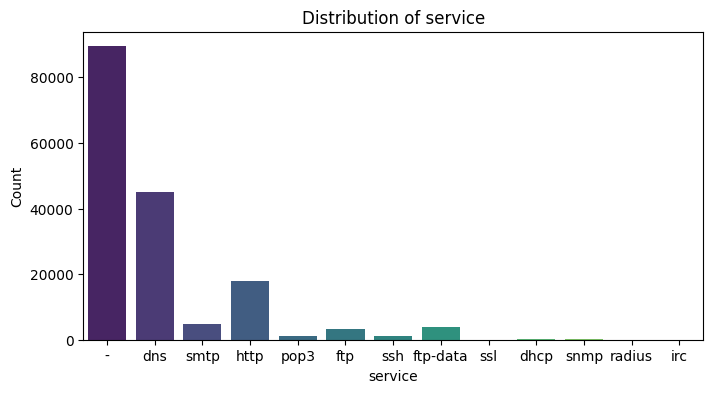

<ipython-input-7-a90169173469>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=column, palette='viridis')


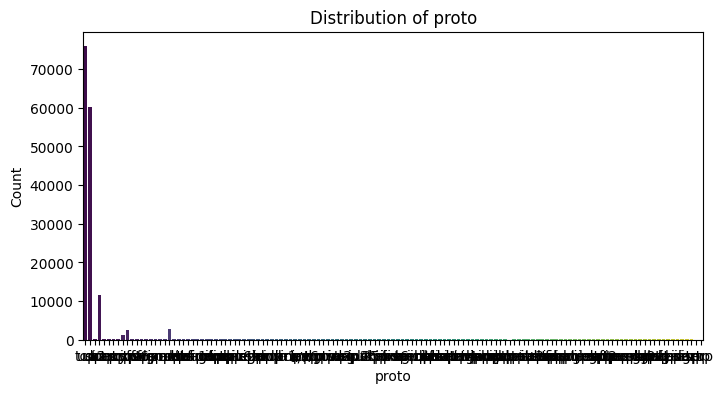

<ipython-input-7-a90169173469>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=column, palette='viridis')


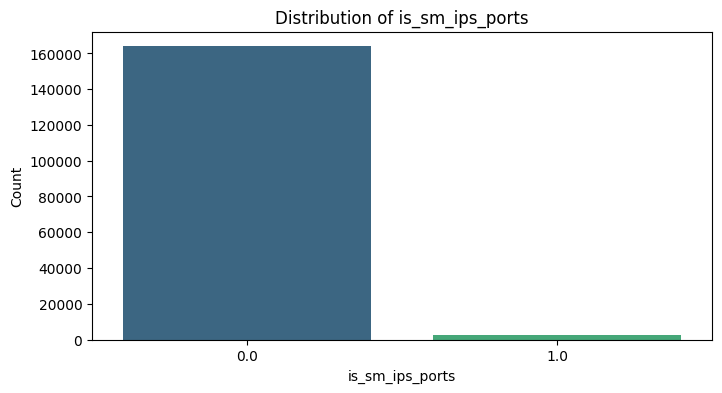

In [ ]:

# Visualisasi distribusi untuk kolom numerik
for column in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_train[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Visualisasi distribusi untuk kolom kategorikal
for column in all_categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_train, x=column, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


## III. Box Plot Outliers

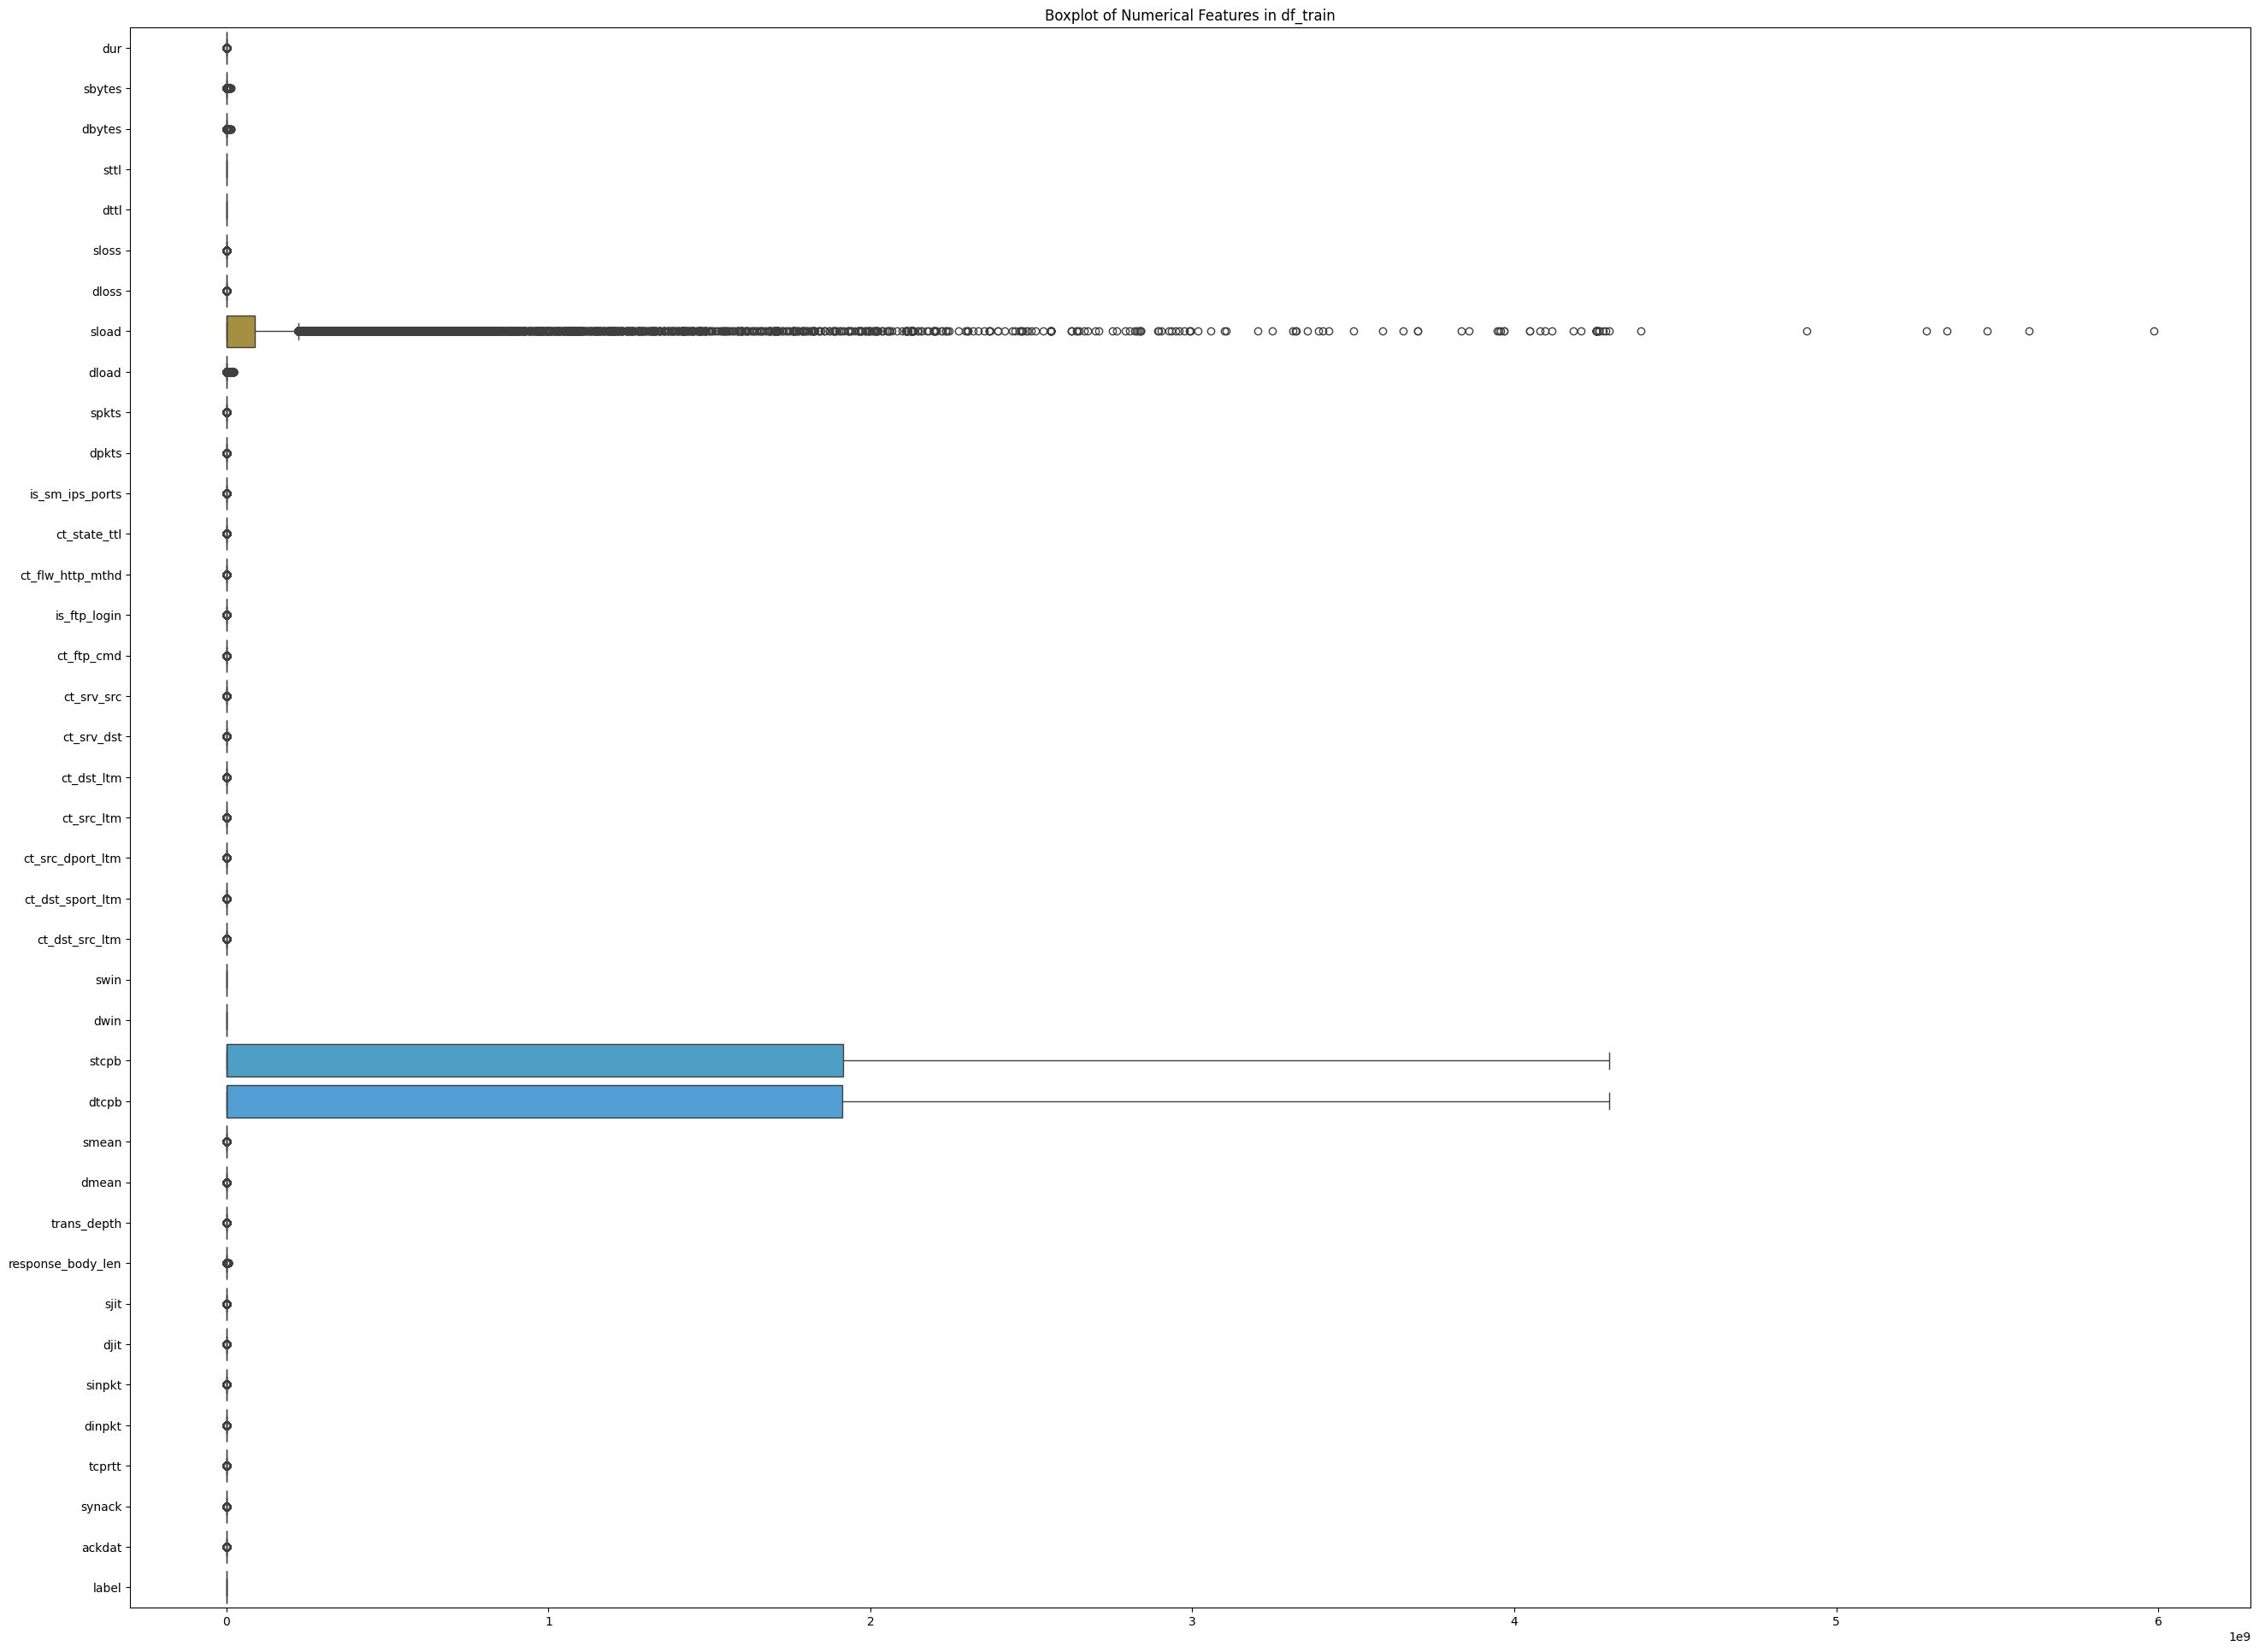

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(32, 24))
sns.boxplot(data=df_train.select_dtypes(include=['float64', 'int64']), orient='h')
plt.title('Boxplot of Numerical Features in df_train')
plt.show()

## IV.Missing Value Check

In [ ]:
df_train.isnull().sum()


,0
state,8805
dur,8722
sbytes,8561
dbytes,8869
sttl,8825
dttl,8654
sloss,8794
dloss,8978
service,8791
sload,8786


## V. Duplikasi Data

In [ ]:
duplicate_rows = df_train.duplicated()

if duplicate_rows.any():
    print(f"Ada {duplicate_rows.sum()} baris duplikat dalam DataFrame.")
    print("Contoh baris duplikat:")
    print(df_train[duplicate_rows].head())
else:
    print("Tidak ada baris duplikat dalam DataFrame.")


Ada 5756 baris duplikat dalam DataFrame.
Contoh baris duplikat:
     state       dur  sbytes  dbytes   sttl  dttl  sloss  dloss service  \
935    INT  0.000009   114.0     NaN  254.0   0.0    0.0    0.0     dns   
1046   INT  0.000009   114.0     0.0  254.0   0.0    0.0    0.0     dns   
1251   INT  0.000009   114.0     0.0  254.0   0.0    0.0    0.0     dns   
2649   INT  0.000005   114.0     0.0  254.0   0.0    0.0    0.0     dns   
3005   INT  0.000009   114.0     0.0  254.0   0.0    0.0    0.0     dns   

           sload  ...  proto  sjit  djit  sinpkt  dinpkt  tcprtt  synack  \
935   50666664.0  ...    udp   0.0   0.0   0.009     0.0     0.0     0.0   
1046  50666664.0  ...    udp   0.0   0.0   0.009     0.0     0.0     0.0   
1251  50666664.0  ...    udp   0.0   0.0   0.009     0.0     0.0     0.0   
2649  91200000.0  ...    udp   0.0   0.0   0.005     0.0     0.0     0.0   
3005  50666664.0  ...    udp   0.0   0.0   0.009     0.0     NaN     0.0   

      ackdat  attack_cat  la

## VI. Matrix Corellation (Numerical)

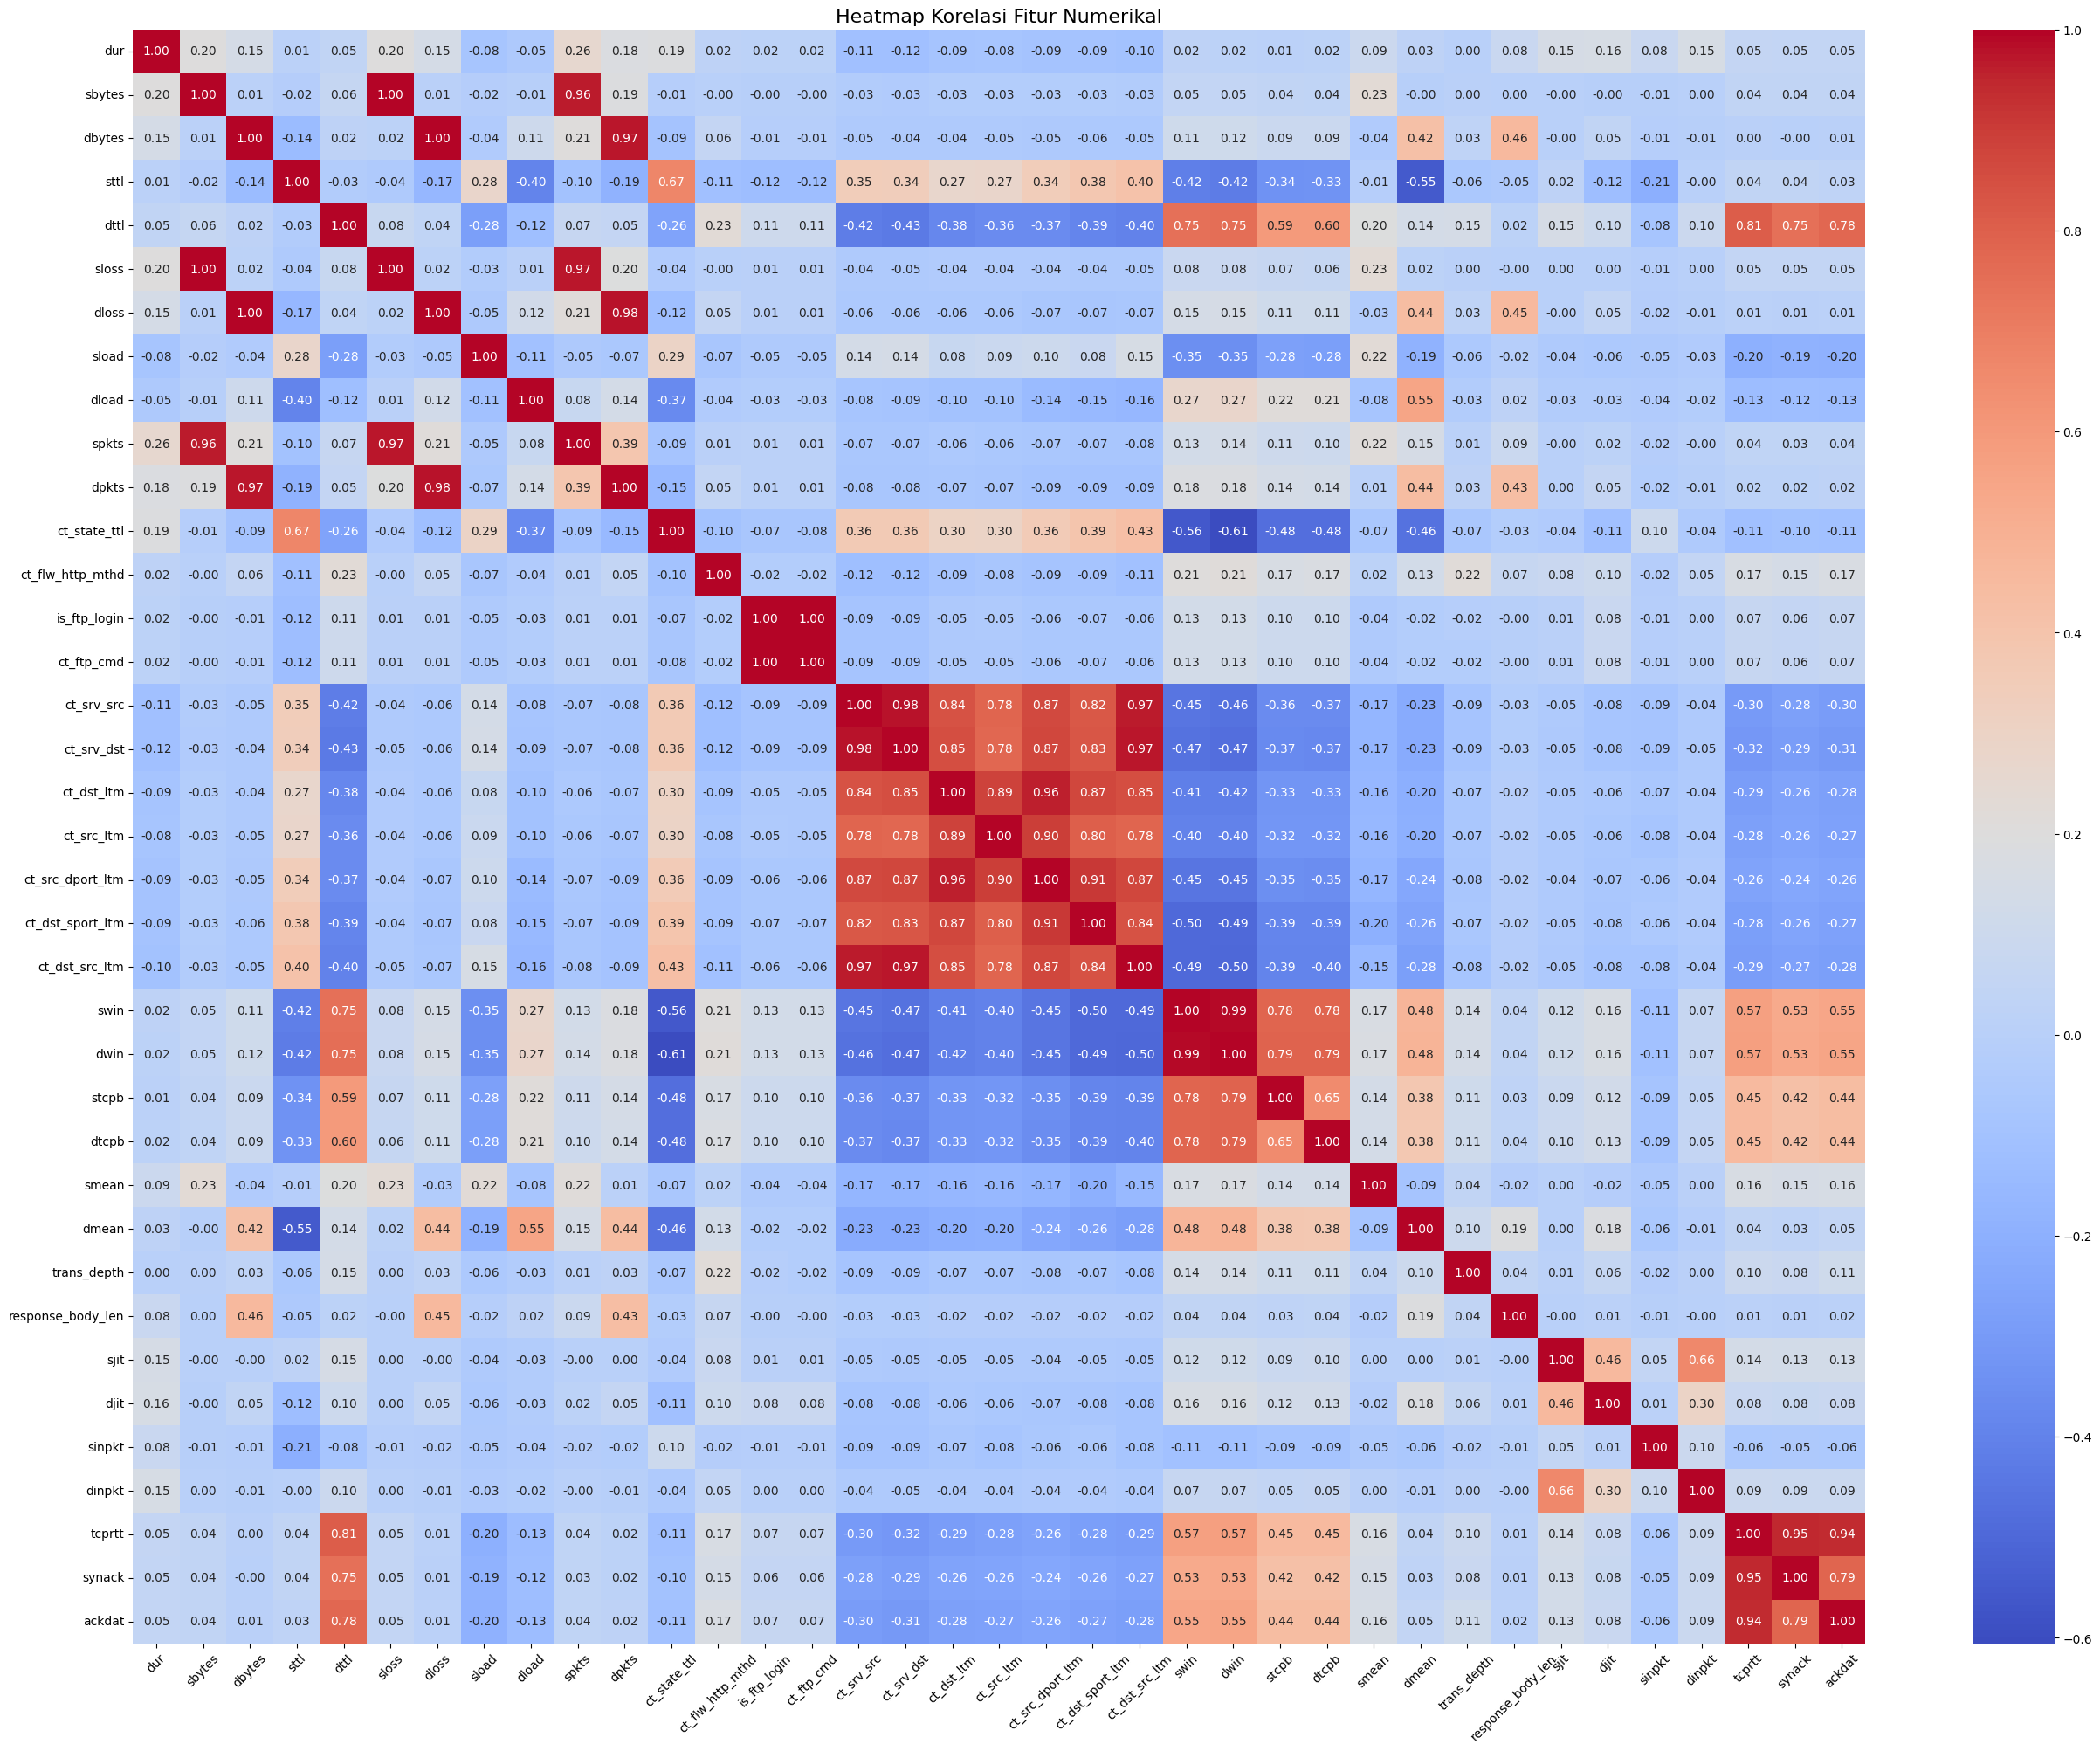

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df_train[numerical_features_strict].corr()


plt.figure(figsize=(32, 24))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi Fitur Numerikal", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [8]:
correlation_matrix = df_train[numerical_features_strict].corr()

high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, correlation_matrix.iloc[i, j]))

for pair in high_corr_pairs:
    print(f"Fitur '{pair[0]}' dan '{pair[1]}' memiliki korelasi: {pair[2]:.2f}")

Fitur 'sloss' dan 'sbytes' memiliki korelasi: 1.00
Fitur 'dloss' dan 'dbytes' memiliki korelasi: 1.00
Fitur 'spkts' dan 'sbytes' memiliki korelasi: 0.96
Fitur 'spkts' dan 'sloss' memiliki korelasi: 0.97
Fitur 'dpkts' dan 'dbytes' memiliki korelasi: 0.97
Fitur 'dpkts' dan 'dloss' memiliki korelasi: 0.98
Fitur 'ct_ftp_cmd' dan 'is_ftp_login' memiliki korelasi: 1.00
Fitur 'ct_srv_dst' dan 'ct_srv_src' memiliki korelasi: 0.98
Fitur 'ct_dst_ltm' dan 'ct_srv_src' memiliki korelasi: 0.84
Fitur 'ct_dst_ltm' dan 'ct_srv_dst' memiliki korelasi: 0.85
Fitur 'ct_src_ltm' dan 'ct_dst_ltm' memiliki korelasi: 0.89
Fitur 'ct_src_dport_ltm' dan 'ct_srv_src' memiliki korelasi: 0.87
Fitur 'ct_src_dport_ltm' dan 'ct_srv_dst' memiliki korelasi: 0.87
Fitur 'ct_src_dport_ltm' dan 'ct_dst_ltm' memiliki korelasi: 0.96
Fitur 'ct_src_dport_ltm' dan 'ct_src_ltm' memiliki korelasi: 0.90
Fitur 'ct_dst_sport_ltm' dan 'ct_srv_src' memiliki korelasi: 0.82
Fitur 'ct_dst_sport_ltm' dan 'ct_srv_dst' memiliki korelasi: 0.8

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [9]:
df_train = df_train.drop_duplicates()
X = df_train.drop(columns=['label', 'attack_cat']) #cuma nyimpen fitur, 2 ini di drop
y = df_train['attack_cat']  # target
# bagi train_set training set (4/5) dan validation set (1/5)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
y.value_counts()

,count
attack_cat,
Normal,55734
Generic,36385
Exploits,32508
Fuzzers,18126
DoS,11712
Reconnaissance,10133
Analysis,1984
Backdoor,1740
Shellcode,1133


# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [10]:
class FeatureImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy="mean"):

        self.strategy = strategy
        self.imputer = SimpleImputer(strategy=self.strategy)

    def fit(self, X, y=None):
        self.imputer.fit(X)
        return self

    def transform(self, X):

        X_transformed = self.imputer.transform(X)
        return X_transformed

# pipeline = Pipeline([
#     ("imputer", FeatureImputer(strategy="mean")),
# ])



### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [11]:
class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=3):
        self.threshold = threshold

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)

        X = X.copy()
        for col in X.columns:
            if X[col].dtype in ['float64', 'int64']:
                z_scores = np.abs((X[col] - X[col].mean()) / X[col].std())
                is_outlier = z_scores > self.threshold
                mean_without_outliers = X.loc[~is_outlier, col].median()
                X.loc[is_outlier, col] = mean_without_outliers
        return X

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [12]:
categorical_features = df_train.drop(columns=['attack_cat','label']).select_dtypes(include=['object']).columns
numerical_features = df_train.drop(columns=['attack_cat','label']).select_dtypes(include=[np.number]).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier_handler', OutlierHandler(threshold=3)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

display(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outlier_handler',
                                                                   OutlierHandler()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload',
       'dload', 'spkts', 'dpkts', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ft...
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit',
       'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['state', 'service', 'proto'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

Feature Importance:
             Feature    Importance
1            sbytes  6.583125e-02
27            smean  5.300545e-02
17       ct_srv_dst  5.047694e-02
3              sttl  4.781385e-02
12     ct_state_ttl  4.713119e-02
..              ...           ...
42        state_PAR  5.169987e-07
45         state_no  3.813468e-07
11  is_sm_ips_ports  0.000000e+00
14     is_ftp_login  0.000000e+00
15       ct_ftp_cmd  0.000000e+00

[191 rows x 2 columns]


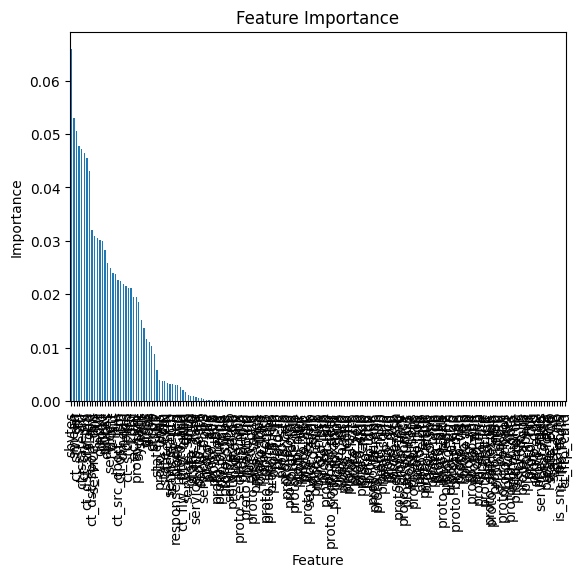

<Figure size 3000x480 with 0 Axes>

In [ ]:
categorical_features = df_train.drop(columns=['attack_cat','label']).select_dtypes(include=['object']).columns
numerical_features = df_train.drop(columns=['attack_cat','label']).select_dtypes(include=[np.number]).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier_handler', OutlierHandler(threshold=3)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

model.fit(X_train, y_train)

importances = model.named_steps['classifier'].feature_importances_

numeric_feature_names = numerical_features
categorical_feature_names = model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

feature_names = list(numeric_feature_names) + list(categorical_feature_names)

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance_df)

feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.figure().set_figwidth(30)
plt.show()


In [ ]:
display(feature_importance_df.head(10))

,Feature,Importance
1,sbytes,0.074909
17,ct_srv_dst,0.063418
27,smean,0.055045
3,sttl,0.050181
12,ct_state_ttl,0.045642
16,ct_srv_src,0.042253
22,ct_dst_src_ltm,0.039513
7,sload,0.037299
21,ct_dst_sport_ltm,0.036669
0,dur,0.035543


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [13]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, method="standard"):
        """
        - method: ("standard" or "minmax")
        """
        self.method = method
        self.scaler = None

    def fit(self, X, y=None):
        if self.method == "standard":
            self.scaler = StandardScaler()
        elif self.method == "minmax":
            self.scaler = MinMaxScaler()
        else:
            raise ValueError("invalid scaling method. Choose 'standard' or 'minmax'.")

        self.scaler.fit(X)
        return self

    def transform(self, X):
        return self.scaler.transform(X)

#
# pipeline = Pipeline([
#     ("scaler", FeatureScaler()),
# ])



### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [14]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, method="onehot", handle_unknown="ignore"):
        """
        - method: str,("onehot" or "label")
        - handle_unknown (dipake untuk OneHotEncoder)
        """
        self.method = method
        self.handle_unknown = handle_unknown
        self.encoder = None

    def fit(self, X, y=None):
        if self.method == "onehot":
            self.encoder = OneHotEncoder(handle_unknown=self.handle_unknown, sparse_output=False)
        elif self.method == "label":
            self.encoder = LabelEncoder()
        else:
            raise ValueError("invalid encoding method. Choose 'onehot' or 'label'.")

        if self.method == "onehot":
            self.encoder.fit(X)
        elif self.method == "label":
            self.encoder.fit(X.ravel())

        return self

    def transform(self, X):
        if self.method == "onehot":
            return self.encoder.transform(X)
        elif self.method == "label":
            return self.encoder.transform(X.ravel()).reshape(-1, 1)


# pipeline = Pipeline([]
#     ("categorical_encoder", FeatureEncoder(handle_unknown="ignore")),
# ])

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

,count
attack_cat,
Normal,44649
Generic,29073
Exploits,25979
Fuzzers,14510
DoS,9346
Reconnaissance,8117
Analysis,1594
Backdoor,1397
Shellcode,897


<Axes: ylabel='count'>

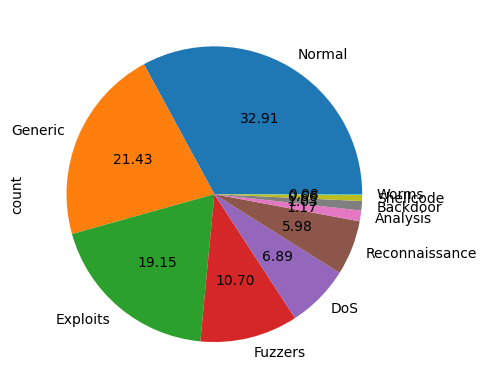

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier

#y = df_train['attack_cat']
display(y_train.value_counts())
y_train.value_counts().plot.pie(autopct="%.2f")






### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [16]:
from sklearn.decomposition import PCA
class PCAFeatureReducer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.pca = PCA(n_components=self.n_components)

    def fit(self, X, y=None):
        self.pca.fit(X)
        return self

    def transform(self, X):
        X_reduced = self.pca.transform(X)
        return X_reduced


# pipeline = Pipeline([
#     ("pca", PCAFeatureReducer(n_components=5)),
# ])



# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

## Feature Selecting

In [ ]:
display(feature_importance_df.head(10))

,Feature,Importance
1,sbytes,0.074909
17,ct_srv_dst,0.063418
27,smean,0.055045
3,sttl,0.050181
12,ct_state_ttl,0.045642
16,ct_srv_src,0.042253
22,ct_dst_src_ltm,0.039513
7,sload,0.037299
21,ct_dst_sport_ltm,0.036669
0,dur,0.035543


In [17]:
categorical_features = df_train.drop(columns=['attack_cat','label']).select_dtypes(include=['object']).columns
numerical_features = df_train.drop(columns=['attack_cat','label']).select_dtypes(include=[np.number]).columns

potentially_categorical = [col for col in numerical_features if df_train[col].nunique() <= 2]
all_categorical_features = list(categorical_features) + potentially_categorical

numerical_features_strict = [col for col in numerical_features if col not in potentially_categorical]

categorical_features = all_categorical_features
numerical_features = numerical_features_strict
print("Total feature: ", len(categorical_features) + len(numerical_features))

# Fitur terpilih,ambil top 5 dan 1 kategorikal state
selected_features = [
    "sbytes", "sttl", "ct_srv_dst",'smean','ct_state_ttl','state'
]


chosen_cat_features = [feature for feature in selected_features if feature in categorical_features]
chosen_num_features = [feature for feature in selected_features if feature in numerical_features]
print("Categorial fitur terpilih: " ,chosen_cat_features)
print("Numerical fitur terpilih: ", chosen_num_features)

## Pilih juga dari chosen num dari high correlasi, kalau ada pasangan high corr, pilih salah satu
final_num_features = chosen_num_features.copy()

for pair in high_corr_pairs:
    feature1, feature2, _ = pair
    if feature1 in final_num_features and feature2 in final_num_features:
        print(f"Fitur {feature1} dan {feature2} korelasi tinggi ")
        final_num_features.remove(feature2)

print("Fitur final numerikal setelah mempertimbangkan korelasi tinggi:", final_num_features)

Total feature:  41
Categorial fitur terpilih:  ['state']
Numerical fitur terpilih:  ['sbytes', 'sttl', 'ct_srv_dst', 'smean', 'ct_state_ttl']
Fitur final numerikal setelah mempertimbangkan korelasi tinggi: ['sbytes', 'sttl', 'ct_srv_dst', 'smean', 'ct_state_ttl']


## General Preprocessor

In [18]:

#Pipeline untuk fitur numerical
numeric_transformer = Pipeline(steps=[
     ('outlier_handler', OutlierHandler(threshold=3)), # cleaning
     ("imputer", FeatureImputer(strategy="median")), # cleaning
     ('scaler',FeatureScaler()), #standardization
     ("pca", PCAFeatureReducer(n_components=5)),#pca


])
#Pipeline untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ("imputer", FeatureImputer(strategy="most_frequent")), # cleaning
    ('onehot', FeatureEncoder(handle_unknown='ignore')), # encoding

])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, final_num_features),
        ('cat', categorical_transformer, chosen_cat_features)
    ])



#Output yang digunakan adalah preprocessor untuk modeling dengan berbagai algoritma nanti selanjutnya
display(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('outlier_handler',
                                                  OutlierHandler()),
                                                 ('imputer',
                                                  FeatureImputer(strategy='median')),
                                                 ('scaler', FeatureScaler()),
                                                 ('pca',
                                                  PCAFeatureReducer(n_components=5))]),
                                 ['sbytes', 'sttl', 'ct_srv_dst', 'smean',
                                  'ct_state_ttl']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  FeatureImputer(strategy='most_frequent')),
                                                 ('onehot', FeatureEncoder())]),
                                 ['state'])])

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

### Preprocessing

In [19]:
# Pipeline untuk fitur numerikal
n_feature_used = len(final_num_features) + len(chosen_cat_features)# Pipeline untuk fitur numerikal
numeric_transformer_knn = Pipeline(steps=[
    ('outlier_handler', OutlierHandler(threshold=3)),  # cleaning
    ("imputer", FeatureImputer(strategy="median")),   # cleaning
    ('scaler', FeatureScaler()),                      # standardization
    ("pca", PCAFeatureReducer(n_components=len(final_num_features) - 1)),# PCA
])

categorical_transformer = Pipeline(steps=[
    ("imputer", FeatureImputer(strategy="most_frequent")),
    ('onehot', FeatureEncoder()),
])

preprocessor_knn = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_knn, final_num_features),
        ('cat', categorical_transformer, chosen_cat_features)
    ]
)


### With Scikit Lib

#### Without Undersample

KNN Accuracy: 78.50%
                precision    recall  f1-score   support

      Analysis       0.23      0.10      0.14       643
      Backdoor       0.16      0.10      0.13       563
           DoS       0.33      0.48      0.39      3835
      Exploits       0.66      0.68      0.67     10769
       Fuzzers       0.67      0.63      0.65      5994
       Generic       0.99      0.98      0.98     12064
        Normal       0.91      0.90      0.91     18345
Reconnaissance       0.87      0.69      0.77      3347
     Shellcode       0.61      0.52      0.56       364
         Worms       0.57      0.42      0.49        40

      accuracy                           0.78     55964
     macro avg       0.60      0.55      0.57     55964
  weighted avg       0.80      0.78      0.79     55964

[[   63    12   266   234    11     0    53     4     0     0]
 [    5    59   254   224    11     1     3     5     1     0]
 [   33    99  1844  1684    72    13    30    35    24     1]
 [ 

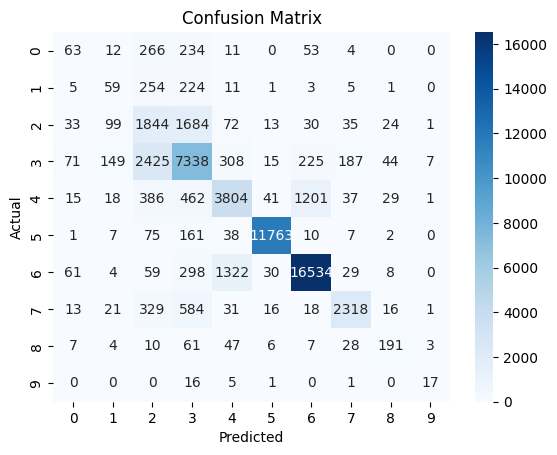

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_knn),
    ('classifier', knn)
])

knn_pipeline.fit(X_train, y_train)

y_pred = knn_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Undersample

KNN Accuracy: 71.07%
                precision    recall  f1-score   support

      Analysis       0.52      0.20      0.29       683
      Backdoor       0.35      0.08      0.13       593
           DoS       0.55      0.85      0.67      3900
      Exploits       0.56      0.35      0.43      1606
       Fuzzers       0.72      0.69      0.70      1648
       Generic       0.99      0.97      0.98      1637
        Normal       0.88      0.82      0.85      1623
Reconnaissance       0.90      0.76      0.83      3352
     Shellcode       0.68      0.73      0.70       371
         Worms       0.58      0.60      0.59        42

      accuracy                           0.71     15455
     macro avg       0.67      0.60      0.62     15455
  weighted avg       0.72      0.71      0.70     15455

[[ 137    5  512   18    6    0    3    2    0    0]
 [   1   49  499   15    8    0    2   14    5    0]
 [  38   44 3329  268   84    2   16   67   48    4]
 [  33   15  814  566   53    0  

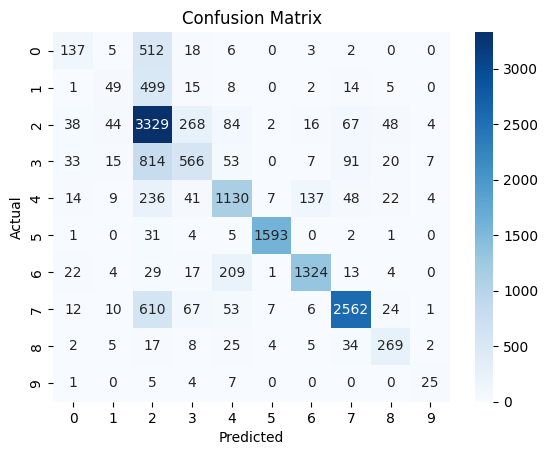

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy={'Normal': 5000, 'Generic': 5000,'Exploits': 5000,'Fuzzers': 5000}, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_knn),
    ('classifier', knn)
])

knn_pipeline.fit(X_train, y_train)

y_pred = knn_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### With Our Implementation

In [20]:
from collections import Counter
from scipy.spatial.distance import cdist
import numpy as np


class KNN:
    def __init__(self, k,distance_method):
        self.k = k
        self.distances_method = distance_method

    def fit(self, X, y):
        self.X_train = X.to_numpy() if hasattr(X, "to_numpy") else X
        self.y_train = y.to_numpy() if hasattr(y, "to_numpy") else y

    def predict(self, X):
        X = X.to_numpy() if hasattr(X, "to_numpy") else X
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        x = x.reshape(1, -1)
        distances = 0
        #euclidean
        if self.distances_method == 1:
          distances = cdist(x, self.X_train, metric='euclidean').flatten()
        #manhattan
        elif self.distances_method == 2:
          distances = cdist(x, self.X_train, metric='cityblock').flatten()
        #minkowski
        elif self.distances_method == 3:
          distances = cdist(x, self.X_train, metric='minkowski').flatten()

        k_indices = np.argpartition(distances, self.k)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


#### Without undersample (Model we used for kaggle submission)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

knn = KNN(5,1)
knn_pipeline_scratch = Pipeline(steps=[
    ('preprocessor', preprocessor_knn),
    ('classifier', knn)
])

knn_pipeline_scratch.fit(X_train, y_train)
display(knn_pipeline_scratch)
y_pred = knn_pipeline_scratch.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_val, y_pred))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier_handler',
                                                                   OutlierHandler()),
                                                                  ('imputer',
                                                                   FeatureImputer(strategy='median')),
                                                                  ('scaler',
                                                                   FeatureScaler()),
                                                                  ('pca',
                                                                   PCAFeatureReducer(n_components=4))]),
                                                  ['sbytes', 'sttl',
                                                   'ct_srv_dst', 'smean',
                                                   'ct_state_ttl']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FeatureImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   FeatureEncoder())]),
                                                  ['state'])])),
                ('classifier', <__main__.KNN object at 0x7ff7b1c63a90>)])

KNN Accuracy: 79.19%
                precision    recall  f1-score   support

      Analysis       0.36      0.10      0.15       390
      Backdoor       0.45      0.07      0.12       343
           DoS       0.35      0.16      0.22      2366
      Exploits       0.60      0.83      0.70      6529
       Fuzzers       0.66      0.65      0.66      3616
       Generic       0.99      0.98      0.98      7312
        Normal       0.91      0.90      0.90     11085
Reconnaissance       0.85      0.71      0.77      2016
     Shellcode       0.58      0.47      0.52       236
         Worms       0.57      0.50      0.53        24

      accuracy                           0.79     33917
     macro avg       0.63      0.54      0.56     33917
  weighted avg       0.78      0.79      0.78     33917



#### Undersample

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy={'Normal': 5000, 'Generic': 5000,'Exploits': 5000,'Fuzzers': 5000}, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

knn = KNN(5,1)
knn_pipeline_scratch = Pipeline(steps=[
    ('preprocessor', preprocessor_knn),
    ('classifier', knn)
])

knn_pipeline_scratch.fit(X_train, y_train)
display(knn_pipeline_scratch)
y_pred = knn_pipeline_scratch.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_val, y_pred))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier_handler',
                                                                   OutlierHandler()),
                                                                  ('imputer',
                                                                   FeatureImputer(strategy='median')),
                                                                  ('scaler',
                                                                   FeatureScaler()),
                                                                  ('pca',
                                                                   PCAFeatureReducer(n_components=5))]),
                                                  ['sbytes', 'sttl',
                                                   'ct_dst_src_ltm', 'smean',
                                                   'ct_state_ttl']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FeatureImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   FeatureEncoder())]),
                                                  ['state'])])),
                ('classifier', <__main__.KNN object at 0x785f8f5d81c0>)])

KNN Accuracy: 67.80%
                precision    recall  f1-score   support

      Analysis       0.22      0.31      0.26       683
      Backdoor       0.52      0.08      0.13       593
           DoS       0.55      0.67      0.60      3900
      Exploits       0.46      0.38      0.42      1606
       Fuzzers       0.71      0.71      0.71      1648
       Generic       0.99      0.97      0.98      1637
        Normal       0.89      0.81      0.85      1623
Reconnaissance       0.84      0.78      0.81      3352
     Shellcode       0.66      0.75      0.71       371
         Worms       0.60      0.64      0.62        42

      accuracy                           0.68     15455
     macro avg       0.64      0.61      0.61     15455
  weighted avg       0.69      0.68      0.67     15455



## B. Naive Bayes

### Preprocessing

In [22]:
numeric_transformer_knn = Pipeline(steps=[
    ('outlier_handler', OutlierHandler(threshold=3)),  # cleaning
    ("imputer", FeatureImputer(strategy="median")),   # cleaning
    ('scaler', FeatureScaler()),                      # standardization
    ("pca", PCAFeatureReducer(n_components=5)),       # PCA
])

categorical_transformer = Pipeline(steps=[
    ("imputer", FeatureImputer(strategy="most_frequent")),
    ('onehot', FeatureEncoder(handle_unknown='ignore')),
])

preprocessor_nb = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_knn, final_num_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


### With Scikit Lib

Naive Bayes Accuracy: 11.86%
                precision    recall  f1-score   support

      Analysis       0.03      0.13      0.05       643
      Backdoor       0.03      0.09      0.05       563
           DoS       0.32      0.02      0.03      3835
      Exploits       0.88      0.03      0.06     10769
       Fuzzers       0.04      0.00      0.00      5994
       Generic       0.01      0.00      0.01     12064
        Normal       0.28      0.31      0.29     18345
Reconnaissance       0.21      0.01      0.02      3347
     Shellcode       0.02      1.00      0.04       364
         Worms       0.00      0.80      0.01        40

      accuracy                           0.12     55964
     macro avg       0.18      0.24      0.06     55964
  weighted avg       0.30      0.12      0.11     55964

[[   81   101    18     0     0   210    24     6    38   165]
 [  137    49    14     3     2   193    45     8    83    29]
 [  781   507    70    29    11  1216   379    40   401   

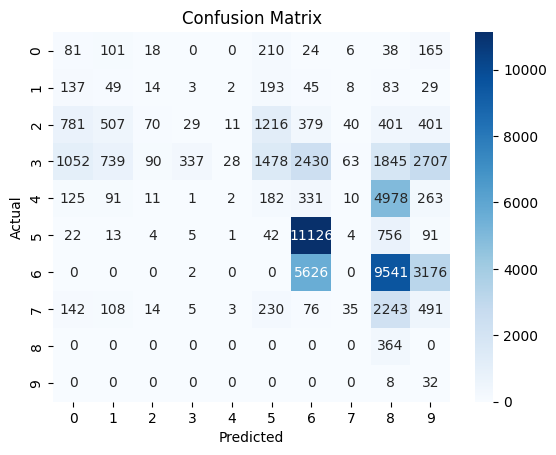

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

naive_bayes = GaussianNB()
nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_nb),
    ('classifier', naive_bayes)
])

nb_pipeline.fit(X_train, y_train)
y_pred = nb_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Naive Bayes Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### With Our Implementation

In [23]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class CustomNaiveBayesClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.class_prior_ = None
        self.feature_probs_ = None
        self.classes_ = None

    def fit(self, X, y):

        n_samples, n_features = X.shape
        # print("n samples: " , n_samples)
        # print("n features: " , n_features)

        #cari berapa banyak count tiap kelas yang ada di y
        self.classes_, counts = np.unique(y, return_counts=True)
        # print("Classes : " ,self.classes_ , " Counts: " , counts)

        #ambil jumlan n kelas unik
        n_classes = len(self.classes_)

        #bagi count sama total, dapet probabilitas
        self.class_prior_ = counts / n_samples
        # print("class prior: " ,self.class_prior_)


        self.feature_means_ = {}
        for idx, cls in enumerate(self.classes_):
            X_cls = X[y == cls]  # get all rows where class == cls
            self.feature_means_[cls] = X_cls.mean(axis=0)
        return self

    def predict(self, X):
        posteriors = np.array([self._compute_posterior(x) for x in X])
        return self.classes_[np.argmax(posteriors, axis=1)]

    def _compute_posterior(self, x):
        posteriors = []
        for idx, cls in enumerate(self.classes_):
            prior = np.log(self.class_prior_[idx])

            mean = self.feature_means_[cls]
            likelihood = -np.sum(np.abs(x - mean))

            posteriors.append(prior + likelihood)

        return posteriors


#### Without Undersampling

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier_handler',
                                                                   OutlierHandler()),
                                                                  ('imputer',
                                                                   FeatureImputer(strategy='median')),
                                                                  ('scaler',
                                                                   FeatureScaler()),
                                                                  ('pca',
                                                                   PCAFeatureReducer(n_components=5))]),
                                                  ['sbytes', 'sttl',
                                                   'ct_srv_dst', 'smean',
                                                   'ct_state_ttl']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FeatureImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   FeatureEncoder())]),
                                                  ['state', 'service', 'proto',
                                                   'is_sm_ips_ports'])])),
                ('classifier', CustomNaiveBayesClassifier())])

Naive Bayes Accuracy: 59.62%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       390
      Backdoor       0.00      0.00      0.00       343
           DoS       0.28      0.69      0.40      2366
      Exploits       0.42      0.14      0.20      6529
       Fuzzers       0.38      0.63      0.47      3616
       Generic       0.89      0.97      0.93      7312
        Normal       0.72      0.75      0.73     11085
Reconnaissance       0.09      0.01      0.02      2016
     Shellcode       0.00      0.00      0.00       236
         Worms       0.00      0.00      0.00        24

      accuracy                           0.60     33917
     macro avg       0.28      0.32      0.28     33917
  weighted avg       0.57      0.60      0.56     33917

[[   0    0  261    8   21    0   97    3    0    0]
 [   0    0  252   13   57    0   19    2    0    0]
 [   0    0 1634  143  244   26  308   11    0    0]
 [   0    0 2162  885  721   33 2712   16    0    0]
 

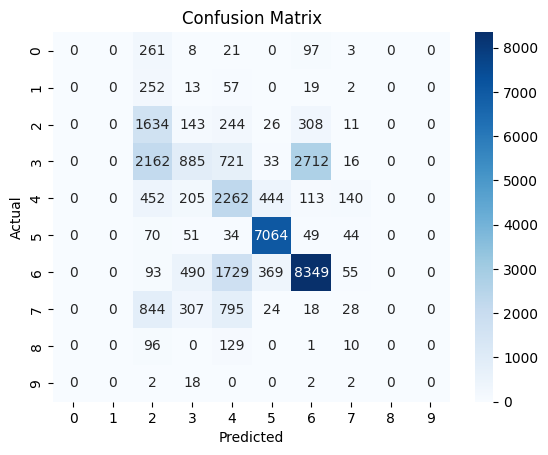

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)
nb_pipeline_scratch = Pipeline(steps=[
    ('preprocessor', preprocessor_nb),
    ('classifier', CustomNaiveBayesClassifier())
])
display(nb_pipeline_scratch)

nb_pipeline_scratch.fit(X_train, y_train)

y_pred = nb_pipeline_scratch.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Naive Bayes Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## C. ID3

### Preprocessing

In [26]:
numeric_transformer_id3 = Pipeline(steps=[
    ('outlier_handler', OutlierHandler(threshold=3)),  # cleaning
    ("imputer", FeatureImputer(strategy="median")),   # cleaning
    # gk perlu standardisasi scaling
])

categorical_transformer = Pipeline(steps=[
    ("imputer", FeatureImputer(strategy="most_frequent")),
    ('onehot', FeatureEncoder(handle_unknown='ignore')),
])

preprocessor_id3 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_id3, final_num_features),
        ('cat', categorical_transformer, chosen_cat_features)
    ]
)


### With Scikit Lib

#### Without Undersampling

ID3 (Decision Tree) Accuracy: 80.09%
                precision    recall  f1-score   support

      Analysis       0.33      0.10      0.15       643
      Backdoor       0.39      0.08      0.14       563
           DoS       0.33      0.13      0.18      3835
      Exploits       0.60      0.85      0.71     10769
       Fuzzers       0.69      0.69      0.69      5994
       Generic       0.99      0.98      0.98     12064
        Normal       0.92      0.90      0.91     18345
Reconnaissance       0.88      0.72      0.79      3347
     Shellcode       0.64      0.54      0.58       364
         Worms       0.63      0.60      0.62        40

      accuracy                           0.80     55964
     macro avg       0.64      0.56      0.57     55964
  weighted avg       0.79      0.80      0.79     55964

[[   65     1    43   468    10     0    51     5     0     0]
 [    2    46    39   457     8     1     3     5     2     0]
 [   11    13   489  3128    71    22    40    38 

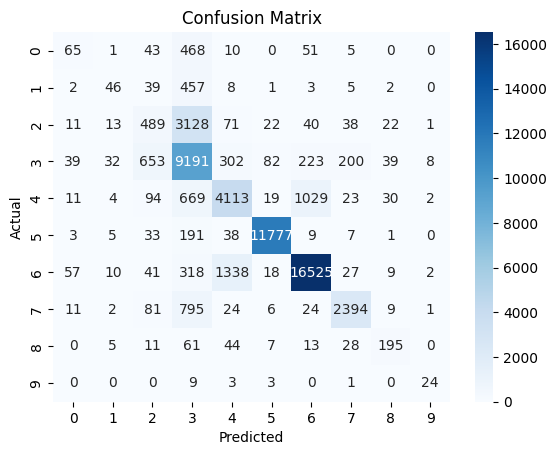

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
id3 = DecisionTreeClassifier(criterion='entropy')
id3_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', id3)
])

id3_pipeline.fit(X_train, y_train)
y_pred = id3_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"ID3 (Decision Tree) Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_val, y_pred))
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Undersampling

ID3 Accuracy: 72.35%
                precision    recall  f1-score   support

      Analysis       0.63      0.18      0.28       683
      Backdoor       0.44      0.08      0.14       593
           DoS       0.55      0.88      0.68      3900
      Exploits       0.58      0.36      0.44      1606
       Fuzzers       0.75      0.72      0.73      1648
       Generic       0.99      0.98      0.98      1637
        Normal       0.90      0.81      0.86      1623
Reconnaissance       0.91      0.78      0.84      3352
     Shellcode       0.70      0.70      0.70       371
         Worms       0.65      0.62      0.63        42

      accuracy                           0.72     15455
     macro avg       0.71      0.61      0.63     15455
  weighted avg       0.74      0.72      0.71     15455

[[ 123    3  522   20    3    0    7    4    1    0]
 [   0   48  504   13    9    0    0   14    5    0]
 [  18   16 3441  236   57    9   10   76   31    6]
 [  22   15  840  571   41    3  

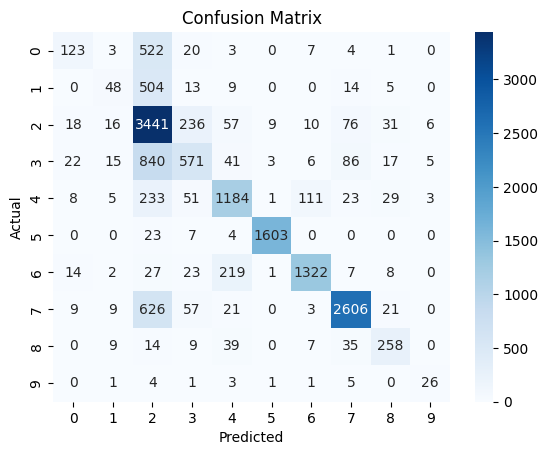

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy={'Normal': 5000, 'Generic': 5000,'Exploits': 5000,'Fuzzers': 5000}, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
id3 = DecisionTreeClassifier(criterion='entropy')
id3_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_id3),
    ('classifier', id3)
])

id3_pipeline.fit(X_train, y_train)

y_pred = id3_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"ID3 Accuracy: {accuracy * 100:.2f}%")
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### With Our Implementation

In [27]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class ID3(BaseEstimator, ClassifierMixin):
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None
        self.feature_names = None
        self.default_class = None

    def calc_entropy(self, y):
        if len(y) == 0:
            return 0
        unique_labels, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
        return entropy

    def calc_gain(self, X, y):
        # hitung entropy parent
        parent_entropy = self.calc_entropy(y)


        unique_values, value_counts = np.unique(X, return_counts=True)

        # hitung weighted entropy
        weighted_entropy = 0
        for value, count in zip(unique_values, value_counts):
            subset_mask = (X == value)
            subset_y = y[subset_mask]

            subset_weight = count / len(y)
            subset_entropy = self.calc_entropy(subset_y)

            weighted_entropy += subset_weight * subset_entropy

        # Calculate and return information gain
        return parent_entropy - weighted_entropy

    def find_best_feature(self, X, y):
        #cari feature terbaik
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        # kalo gaada lagi feature
        if X.shape[1] == 0:
            return None

        # hitung gain
        gains = [self.calc_gain(X[:, i], y) for i in range(X.shape[1])]
        best_feature_idx = np.argmax(gains)
        return best_feature_idx if gains[best_feature_idx] > 0 else None

    def build_tree(self, X, y, depth):
        # Most common class as default prediction
        unique_classes, class_counts = np.unique(y, return_counts=True)
        default_class = unique_classes[np.argmax(class_counts)]

        # Base case
        if (self.max_depth is not None and depth >= self.max_depth) or \
           len(np.unique(y)) == 1 or X.shape[1] == 0:
            return {"predicted_class": default_class}

        # cari feature terbaik
        best_feature_idx = self.find_best_feature(X, y)

        # return default jika tidak ada feature terbaik
        if best_feature_idx is None:
            return {"predicted_class": default_class}

        # node
        node = {
            "feature_idx": best_feature_idx,
            "branches": {},
            "predicted_class": default_class
        }

        # ambil unique val dari best feature
        unique_values = np.unique(X[:, best_feature_idx])

        # buat branch untuk unique val
        for value in unique_values:
            mask = X[:, best_feature_idx] == value

            X_subset = np.delete(X[mask], best_feature_idx, axis=1)
            y_subset = y[mask]

            # buat sub tree
            node["branches"][value] = self.build_tree(X_subset, y_subset, depth + 1)

        return node

    def fit(self, X, y):

        X = np.asarray(X)
        y = np.asarray(y)

        y = y.astype(np.int64)

        unique_classes, class_counts = np.unique(y, return_counts=True)
        self.default_class = unique_classes[np.argmax(class_counts)]
        self.tree = self.build_tree(X, y, 0)

        return self

    def predict_one(self, inputs, node):
        if "feature_idx" not in node:
            return node.get("predicted_class", self.default_class)

        feature_value = inputs[node["feature_idx"]]
        branch = node["branches"].get(feature_value)

        # check apakah ada matching branch, klo ga ada return predicted class
        if branch is None:
            return node.get("predicted_class", self.default_class)

        # traverse tree
        return self.predict_one(np.delete(inputs, node["feature_idx"]), branch)

    def predict(self, X):
        X = np.asarray(X)
        return np.array([self.predict_one(x, self.tree) for x in X])

#### Without Undersampling

In [28]:

from sklearn.preprocessing import LabelEncoder
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)
le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

id3_scratch_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_id3),
    ('classifier', ID3())
])


id3_scratch_pipeline.fit(X_train, y_train_encoded)
display(id3_scratch_pipeline)
y_pred = id3_scratch_pipeline.predict(X_val)
y_pred_original = le.inverse_transform(y_pred)
accuracy = accuracy_score(y_val, y_pred_original)
print(f"ID3 (Decision Tree) Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_val, y_pred_original))


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier_handler',
                                                                   OutlierHandler()),
                                                                  ('imputer',
                                                                   FeatureImputer(strategy='median'))]),
                                                  ['sbytes', 'sttl',
                                                   'ct_srv_dst', 'smean',
                                                   'ct_state_ttl']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FeatureImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   FeatureEncoder())]),
                                                  ['state'])])),
                ('classifier', ID3())])

ID3 (Decision Tree) Accuracy: 77.64%
                precision    recall  f1-score   support

      Analysis       0.36      0.10      0.16       390
      Backdoor       0.39      0.08      0.13       343
           DoS       0.35      0.12      0.18      2366
      Exploits       0.57      0.76      0.65      6529
       Fuzzers       0.69      0.66      0.67      3616
       Generic       0.99      0.97      0.98      7312
        Normal       0.86      0.89      0.87     11085
Reconnaissance       0.87      0.71      0.78      2016
     Shellcode       0.59      0.46      0.51       236
         Worms       0.57      0.50      0.53        24

      accuracy                           0.78     33917
     macro avg       0.62      0.53      0.55     33917
  weighted avg       0.76      0.78      0.76     33917



### SAVING MODEL

In [29]:
from joblib import dump


dump(id3_scratch_pipeline, 'id3_pipeline.joblib')
dump(nb_pipeline_scratch, 'nb_pipeline.joblib')
dump(knn_pipeline_scratch, 'knn_pipeline.joblib')
print("Model saved")


Model saved


### LOAD MODEL

In [ ]:
from joblib import load
#load
loaded_pipeline = load('/content/knn_pipeline.joblib')
print("Model loaded successfully")

y_pred_load = loaded_pipeline.predict(X_val)
accuracy_load = accuracy_score(y_val, y_pred_load)
print(f"Loaded Model Accuracy: {accuracy_load* 100:.2f}%")
print(classification_report(y_val, y_pred_load))

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:


y_test_pred = knn_pipeline_scratch.predict(df_test)
# y_pred_original = le.inverse_transform(y_test_pred)

submission_df = pd.DataFrame({
    'id': df_test['id'] if 'id' in df_test.columns else range(len(y_test_pred)),
    'attack_cat': y_test_pred
})

submission_file = "knn_submission_scratch.csv"
submission_df.to_csv(submission_file, index=False)
print(f"Submission file saved to: {submission_file}")

Submission file saved to: knn_submission_scratch.csv


# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

Based on our experiments, our model struggles to predict three classes: Analysis, Backdoor, and DoS. This issue is likely due to insufficient representation of patterns in the training data, making it challenging for the model to accurately predict new data for these classes.

Our experiments show that KNN performs best, achieving the highest accuracy. This is likely because KNN is well-suited for datasets where the majority of features are numerical. Its distance-based approach effectively captures relationships in numerical feature space, which aligns with the structure of our selected features.

Feature scaling improves our model's performance because methods like Min-Max Scaling or Standardization ensure that all features contribute equally to distance calculations, reducing bias caused by differences in feature ranges